

# <font color='magenta'>**CURSO: MACHINE LEARNING**</font>
![image](https://github.com/user-attachments/assets/dd06ab85-4ccf-4666-9f8e-2b566572cda9)  

[![Abrir no Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1HVeEEjf8YwtI3PhiB_3cxroliLS6yPcA?usp=sharing)

# **Projeto de Classificação de Frutas e Vegetais**

##### Este Notebook detalha todas as etapas dos **dados de treino, validação e teste** referentes a primeira entrega do projeto.

- **Escola**: Atlântico Avanti
- **Alunos**: Arthur Vale Fonseca e Samuel Cassiano de Abreu
- **Atividade**: 04 - Todas as Etapas (1, 2 e 3)
- **Tema**: Projeto de classificação de imagens de Frutas e Vegetais
- **Conteúdo**: Módulo 3

## Arquivos

- **Dataset**: [Kaggle - Fruit and Vegetable Image Recognition](https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition/data)


- **Verificações**:

  1.	Integridade dos Arquivos
  2.	Consistência dos Metadados
  3.	Qualidade das Imagens
  4.	Distribuição das Classes
  5.	Duplicatas



**Data**: 11/2024


#### ***-> Este Notebook é composto por 3 Etapas <-***

# **VISÃO GERAL DA ETAPA 1 - INFORMAÇÕES DO DATASET**


| **Tópico**                    | **Análise**                                  | **Conclusão**                   |
|-------------------------------|----------------------------------------------|---------------------------------------------|
| **Integridade dos Arquivos**   | 3824 imagens                                |           100% presentes                    |
| **Consistência dos Metadados** | Sem valores ausentes                        |           100% Categorizadas                |
|                                | Apenas 7% das imagens entre (640x480 a 2560x1440 pixels)|  Redimensionamento sugerido     |
| **Qualidade das Imagens**      | 1 imagem corrompida                         |  Será removida                              |
|                                | Boa qualidade visual na maioria das imagens.|  Redimensionamento sugerido   |
| **Distribuição das Classes**   | Leve desbalanceamento                       |  Exclusão de duplicatas pode equilibrar as classes.   |
| **Duplicatas**                 | 211 duplicatas em "train", 26 em "validation" e 26 em "test" |    Remoção para evitar viés no treinamento  |


### **1 - Baixar o Dataset do Kaggle**

In [1]:
# Installing Libraries
%pip install opendatasets
%pip install pandas
%pip install imagehash
%pip install opencv-python
%pip install termcolor
%pip install tensorflow
%pip install pydot
%pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/296.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/296.5 kB ? eta -:--:--
   -------- ------------------------------ 61.4/296.5 kB 812.7 kB/s eta 0:00:01
   -------------------------------------- - 286.7/296.5 kB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 296.5/296.5 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because n

In [1]:
# Download Kaggle Dataset
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition


100%|██████████| 1.98G/1.98G [01:18<00:00, 27.2MB/s]


### **1.1 - Importar Bibliotecas**

In [2]:
%pip install silence_tensorflow

# A function to avoid tensorflow warnings
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for silence_tensorflow: filename=silence_tensorflow-1.2.3-py3-none-any.whl size=6793 sha256=1630a0d19d85e728e4afe04f176cdaf432d4866fd32b1d024fef0708aa1bfd64
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\2e\91\a1\2d32c0ea21439c6367fe1acaa2d3a0377a95ae51cf47c13521
Successfully built silence_tensorflow
Note: you may need to restart the kernel to use updated packages.


In [7]:
# Important Libraries for data conversion into Dataframe and Model Training

import os
import cv2
import random
import warnings
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
from termcolor import colored
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from keras.utils import plot_model
from tensorflow.keras import optimizers
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
'''
- Set the seaborn plot style to "darkgrid" for better visualization.
- This creates a dark background with a white grid for the plots.
'''
sns.set_style('darkgrid')

'''
- Suppress warning messages to keep the output clean.
- Note: Use this with caution as it might hide important information.
'''
warnings.filterwarnings('ignore')

### **1.2 - Atrbuição de caminhos para um Diretório e Pastas**

In [9]:
# Assigning a path to a directory
base_dir = './fruit-and-vegetable-image-recognition'

In [10]:
# assigning directory folders
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

### **2 - Criar um Dataframe com os metadados das imagens**

In [ ]:

# importando Bibiloteca imagehash
'''This command imports the imagehash library, which is used to generate perceptual hashes of images.
Perceptual hashing is a technique that creates a unique "fingerprint" of an image based on its visual characteristics.
This is useful for finding similar or duplicate images, even if they have been slightly modified.'''
import imagehash

# exibe os gráficos gerados diretamente na saida da célula do notebook
%matplotlib inline

# importando o módulo Image da biblioteca Pillow
'''Pillow is an image processing library in Python
which allows you to open, manipulate and save images in various formats.
The Image module is the main interface for working with images in Pillow.'''
from PIL import Image

# criando as variáveis de itens corrompidos
count_corrupted = 0
corrupted = list()

In [20]:
# Define the data directories
base_dir = './fruit-and-vegetable-image-recognition'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# List of directories to iterate through
data_dirs = [train_dir, validation_dir, test_dir]

# Initialize the list to store image information
dataframe_list = list()

# Initialize corrupted image counter and list
count_corrupted = 0
corrupted = list()

# Main loop to iterate through data directories (train, validation, test)
for data_dir in data_dirs:
    # Get the current folder name (train, validation, or test)
    folder_name = os.path.basename(data_dir)

    # Loop to iterate through category folders (Labels) within the current data directory
    for category_folder in os.listdir(data_dir):  
        category_path = os.path.join(data_dir, category_folder)

        # Loop to iterate through images within the category folder
        for image in os.listdir(category_path): 
            # Create the full path to the image
            img_dir = os.path.join(category_path, image)  

            # Check if the filename has an extension before splitting
            if '.' in image:
                _, image_format = image.split('.')
            else:
                image_format = None

            # Load the image using OpenCV
            img = cv2.imread(img_dir)

            # Check if the image was loaded correctly
            if img is not None:
                # Convert the image to RGB
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Convert the image to Pillow format
                img_pil = Image.fromarray(img_rgb)

                # Generate the perceptual hash of the image
                img_hash = imagehash.phash(img_pil)

                # Extract the width, height, and number of channels of the image
                width, height, channels = img.shape

                # Mark the image as not corrupted
                img_corrupted = False
            else:
                # Increment the corrupted image counter
                count_corrupted += 1

                # Add the path of the corrupted image to the list
                corrupted.append(img_dir)

                # Mark the image as corrupted and set attributes to None
                img_corrupted = True
                img_hash, image_format, width, height, channels = None, None, None, None, None

            # Add image information to the main list, including folder name and category
            dataframe_list.append([img_dir, img_corrupted, img_hash, image_format, 
                                  width, height, channels, folder_name, category_folder]) 

print(f"Total corrupted images: {count_corrupted}")
print(f"List of corrupted images: {corrupted}")

Total corrupted images: 1
List of corrupted images: ['./fruit-and-vegetable-image-recognition\\train\\bell pepper\\Image_56.jpg']


In [22]:
# TRYING TO VISUALIZE THE IMAGE MARKED AS CORRUPT

# Path to the corrupted image
img_path = corrupted[0]  # Using the first item in the 'corrupted' list as an example

# Attempt to load the image using OpenCV
img = cv2.imread(img_path)

# If the image was loaded (even if corrupted)
if img is not None:
    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converting to RGB
    plt.title("Corrupted Image")
    plt.show()
else:
    print(f"Could not load the image: {img_path}")

Could not load the image: ./fruit-and-vegetable-image-recognition\train\bell pepper\Image_56.jpg


### **2.1 - Comparação de Imagens - Corrompida x Não Corrompida**


### **- In the source of data origin, the image indicated as corrupted has a much smaller dimension than the others:**

<br>

# <font color='magenta'>**CORRUPTED IMAGE:**</font>
![image](https://github.com/user-attachments/assets/c987b234-a2c6-41cb-bcea-c743ce6189d7)  

<br>

# <font color='magenta'>**OTHER IMAGES HAVE THIS STANDARD SIZE:**</font>
![image](https://github.com/user-attachments/assets/778771e4-d898-4c03-86e5-863742e28e85)

### **2.2 - Criando Data Frame e Analisando algumas Linhas**

In [27]:
'''
img_dir: Path to the image file.
img_corrupted: Indicates whether the image is corrupted (True/False).
img_hash: Perceptual hash of the image.
image_format: Image file format (e.g. JPG, PNG).
width: Width of the image in pixels.
height: Image height in pixels.
channels: Number of color channels in the image (ex: 3 for RGB).
folder_name: Name of the folder
category_folder: Label or class of the image (ex: apple).
'''

df = pd.DataFrame(columns=['img_dir', 'img_corrupted', 'img_hash', 'image_format', 'width', 'height', 'channels', 'folder_name', 'category_folder'], data = dataframe_list)


df.head()

img_dir  img_corrupted  \
0  ./fruit-and-vegetable-image-recognition\train\...          False   
1  ./fruit-and-vegetable-image-recognition\train\...          False   
2  ./fruit-and-vegetable-image-recognition\train\...          False   
3  ./fruit-and-vegetable-image-recognition\train\...          False   
4  ./fruit-and-vegetable-image-recognition\train\...          False   

           img_hash image_format   width  height  channels folder_name  \
0  e1cf963493639c38          jpg  2216.0  2218.0       3.0       train   
1  e99c96789d653826          jpg  1200.0  1200.0       3.0       train   
2  ed9b904ccf311c65          jpg   249.0   250.0       3.0       train   
3  aaeaccc3d8dd5203          jpg   800.0  1200.0       3.0       train   
4  b49c939c1e6ccccc          jpg   720.0  1280.0       3.0       train   

  category_folder  
0           apple  
1           apple  
2           apple  
3           apple  
4           apple

### **3 - Verificar a Integridade dos Arquivos**

In [32]:
# Statistical information on image height, width and channel values

df.describe().loc[['mean', 'std', 'min', 'max']]

width       height  channels
mean  1132.983787  1358.873169       3.0
std    807.650517   994.798972       0.0
min    147.000000   133.000000       3.0
max   6351.000000  7360.000000       3.0

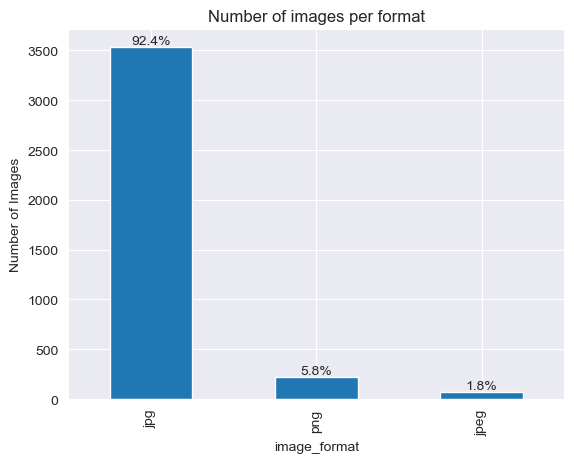

In [33]:
# Percentage of Images by Format (JPG, PNG, etc.)

# Convert the 'image_format' column to lowercase
df['image_format'] = df['image_format'].str.lower()

# Calculate the count of images per format and the percentages
format_counts = df['image_format'].value_counts()
total_images = format_counts.sum()
format_percentages = (format_counts / total_images) * 100

# Create the bar chart
ax = format_counts.plot(kind='bar', title='Number of images per format')

# Add percentages above the bars
for i, v in enumerate(format_counts):
    ax.text(i, v + 0.5, f'{format_percentages.iloc[i]:.1f}%', ha='center', va='bottom')

# Adjust the y-axis labels
ax.set_ylabel('Number of Images')

# Display the chart
plt.show()

### **4 - Verificar a Consistência dos Metadados**

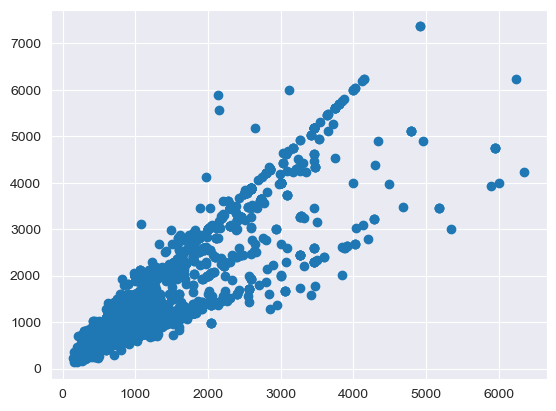

In [ ]:
# Distribution of Height and Width Dimensions of Images

plt.scatter(df['width'], df['height'])

### **4.1 - Verificar o Percentual de imagens contidas em um conjunto de dimensões específicas**

In [38]:
# 1. Define the desired dimension range
min_width = 640
max_width = 2560
min_height = 480
max_height = 1440

# 2. Filter the images within the range
filtered_df = df[(df['width'] >= min_width) & (df['width'] <= max_width) &
                 (df['height'] >= min_height) & (df['height'] <= max_height)]

# 3. Calculate unique dimensions and their frequencies within the range
dimension_counts = filtered_df.groupby(['width', 'height']).size().reset_index(name='count')

# 4. Find the most frequent dimension within the range
most_frequent_dimension = dimension_counts.loc[dimension_counts['count'].idxmax()]

# 5. Extract width and height of the most frequent dimension
standard_width = most_frequent_dimension['width']
standard_height = most_frequent_dimension['height']

# 6. Calculate the percentage of the most frequent dimension within the range
standard_images_percentage = (most_frequent_dimension['count'] / filtered_df.shape[0]) * 100  # Use filtered_df.shape[0] here

# 7. Calculate the percentage of images outside the standard (considering the total number of images)
non_standard_images_percentage = 100 - (most_frequent_dimension['count'] / df.shape[0]) * 100  # Use df.shape[0] here

# 8. Generate the textual summary
summary = f"Image Dimensions: \nWe identified that only {standard_images_percentage:.0f}% of the images follow a resolution standard of ({min_width}x{min_height} to {max_width}x{max_height} pixels)."

# Display the summary
print(summary)

diff_percentage = 100 - standard_images_percentage
print(f"\nOn the other hand, {diff_percentage:.0f}% of the remaining images presented diverse dimensions.")


Image Dimensions: 
We identified that only 7% of the images follow a resolution standard of (640x480 to 2560x1440 pixels).

On the other hand, 93% of the remaining images presented diverse dimensions.


### **4.2 - Plotando um BoxPlot para melhorar a vusialização da dimensão das Imagens**

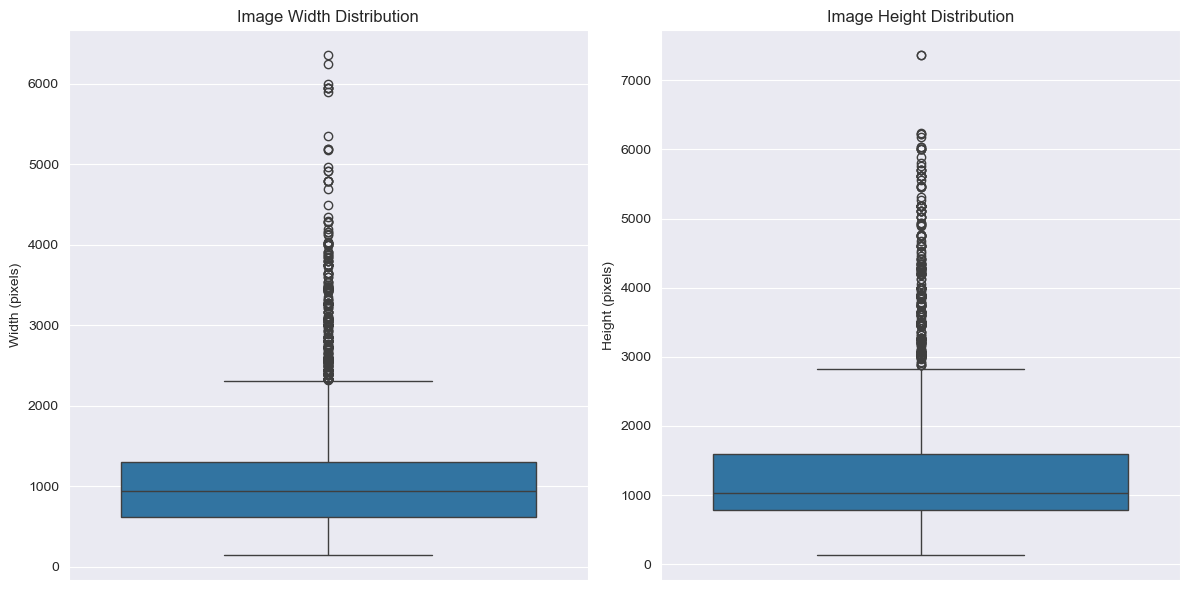

In [39]:
# Creating the Boxplot for image width and height
plt.figure(figsize=(12, 6))  # Adjusting the figure size

# Boxplot for width
plt.subplot(1, 2, 1)  # Creating a subplot for width (1 row, 2 columns, first plot)
sns.boxplot(y=df['width'])  # Plotting the boxplot for the 'width' column
plt.title('Image Width Distribution') 
plt.ylabel('Width (pixels)') 

# Boxplot for height
plt.subplot(1, 2, 2)  # Creating a subplot for height (1 row, 2 columns, second plot)
sns.boxplot(y=df['height'])  # Plotting the boxplot for the 'height' column
plt.title('Image Height Distribution')
plt.ylabel('Height (pixels)')

plt.tight_layout()  # Adjusting the layout to prevent overlapping
plt.show()  # Displaying the plot


### **4.3 - Quantidade de Informações Nulas**

In [ ]:
# Amount of null information

'''
The image that appears with null format, width, height and channel is "Image_56.jpg"
'''

df.isnull().sum()


img_dir            0
img_corrupted      0
img_hash           1
image_format       1
width              1
height             1
channels           1
folder_name        0
category_folder    0
dtype: int64

### **5 - Analisar a Qualidade das Imagens**

In [45]:
# Total corrupted images

'''
The image that appears with null format, width, height and channel is "Image_56.jpg"
'''

df['img_corrupted'].sum()

1

### **5.1 - Numero de Imagens Corrompidas x Não Corrompidas**

In [47]:
# Number of corrupted and uncorrupted images

'''
The image that appears with null format, width, height and channel is "Image_56.jpg"
'''

df['img_corrupted'].value_counts()

img_corrupted
False    3824
True        1
Name: count, dtype: int64

### **6 - Verificar a Distribuição das Classes**

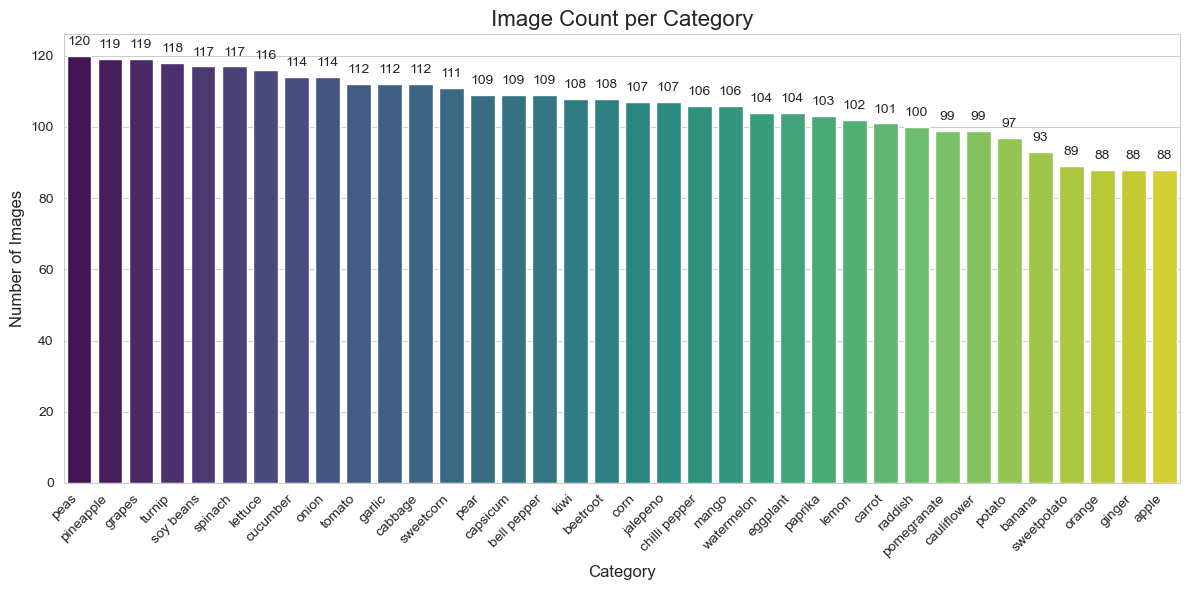

In [56]:
# Creating the label_counts DataFrame using 'category_folder'
# This DataFrame will store the count of images for each category
label_counts = df.groupby('category_folder')['category_folder'].count().reset_index(name='count')

# Sorting label_counts in descending order of 'count'
# This ensures the categories are displayed in descending order of image count in the plot
label_counts = label_counts.sort_values(by=['count'], ascending=False)

# Setting a style for the plot (optional)
# This uses the 'whitegrid' style for a clean look
sns.set_style("whitegrid")

# Creating the bar plot
plt.figure(figsize=(12, 6))  # Setting the figure size
# Creating the bar plot using seaborn, with specified order and palette
ax = sns.barplot(x="category_folder", y="count", data=label_counts, palette="viridis", order=label_counts['category_folder'])
plt.title("Image Count per Category", fontsize=16)  # Setting the plot title
plt.xlabel("Category", fontsize=12)  # Setting the x-axis label
plt.ylabel("Number of Images", fontsize=12)  # Setting the y-axis label
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotating x-axis labels for readability

# Adding value labels above each bar
for p in ax.patches:
    # Annotating the bar with its count value
    ax.annotate(
        format(p.get_height(), ".0f"),  # Formatting the count value as an integer
        (p.get_x() + p.get_width() / 2.0, p.get_height()),  # Positioning the label above the bar
        ha="center",  # Horizontally centering the label
        va="center",  # Vertically centering the label
        xytext=(0, 10),  # Offsetting the label slightly above the bar
        textcoords="offset points",  # Using offset points for positioning
        fontsize=10,  # Setting the label font size
    )

plt.tight_layout()  # Adjusting the layout to prevent overlapping elements
plt.show()  # Displaying the plot

In [110]:
# Calculate the average number of images per category
average_images_per_category = df.groupby('category_folder')['img_dir'].count().mean()

print(f"Average number of images per category: {average_images_per_category}")

Average number of images per category: 106.25


### **7 - Verificar a Presença de Duplicatas**

In [78]:
# Number of duplicate images in each Folder (train, validation and test)

# Function to calculate information for each folder
def get_folder_info(df, folder_name):
    folder_df = df[df['folder_name'] == folder_name]  # Filter DataFrame for the specified folder
    total_count = len(folder_df)  # Calculate total image count in the folder
    duplicate_count = folder_df['img_hash'].duplicated().sum()  # Calculate duplicate image count using image hashes
    return folder_name, total_count, duplicate_count  # Return the folder information

# Getting information for each folder
train_info = get_folder_info(df, 'train')  # Get information for the 'train' folder
validation_info = get_folder_info(df, 'validation')  # Get information for the 'validation' folder
test_info = get_folder_info(df, 'test')  # Get information for the 'test' folder

# Creating the table
data = [train_info, validation_info, test_info]  # Store folder information in a list
summary_table = pd.DataFrame(data, columns=['Folder', 'Total Quantity', 'Repeated Images'])  # Create DataFrame from the list

print(summary_table)

       Folder  Total Quantity  Repeated Images
0       train            3115              221
1  validation             351               26
2        test             359               26


### **7.1 - Agrupar Imagens Duplicatas e Mostrar o Dicionário**

In [ ]:
'''
Scroll through duplicate images, find all images
with the same hash and groups them in a dictionary, facilitating identification
and access to all copies of a duplicate image.
'''
# Defining df_duplicated to include rows with duplicate 'img_hash' values
df_duplicated = df[df['img_hash'].duplicated(keep=False)] 

duplicated_images = {}
for i in range(df_duplicated.shape[0]):
  hash_duplicated = df_duplicated.iloc[i]['img_hash']
  duplicated = df[df['img_hash'] == hash_duplicated]["img_dir"].values
  duplicated_images[str(hash_duplicated)] = duplicated.tolist()

In [87]:
# Images corresponding to each duplicate image

duplicated_images

{'edc9c178961e92e4': ['./fruit-and-vegetable-image-recognition\\train\\banana\\Image_41.jpg',
  './fruit-and-vegetable-image-recognition\\train\\banana\\Image_53.png'],
 'baccc0139d7e846b': ['./fruit-and-vegetable-image-recognition\\train\\banana\\Image_100.jpg',
  './fruit-and-vegetable-image-recognition\\train\\banana\\Image_8.jpg',
  './fruit-and-vegetable-image-recognition\\validation\\banana\\Image_8.jpg',
  './fruit-and-vegetable-image-recognition\\test\\banana\\Image_8.jpg'],
 'f89e8565c3781c3c': ['./fruit-and-vegetable-image-recognition\\train\\banana\\Image_1.jpg',
  './fruit-and-vegetable-image-recognition\\train\\banana\\Image_93.jpg',
  './fruit-and-vegetable-image-recognition\\validation\\banana\\Image_1.jpg',
  './fruit-and-vegetable-image-recognition\\validation\\banana\\Image_10.jpg',
  './fruit-and-vegetable-image-recognition\\test\\banana\\Image_1.jpg',
  './fruit-and-vegetable-image-recognition\\test\\banana\\Image_10.jpg'],
 'ead2b54fd03d8225': ['./fruit-and-vegetab

### **7.2 - Plotar Imagens Agrupadas de cada Pasta (Train, Validation e Test)**

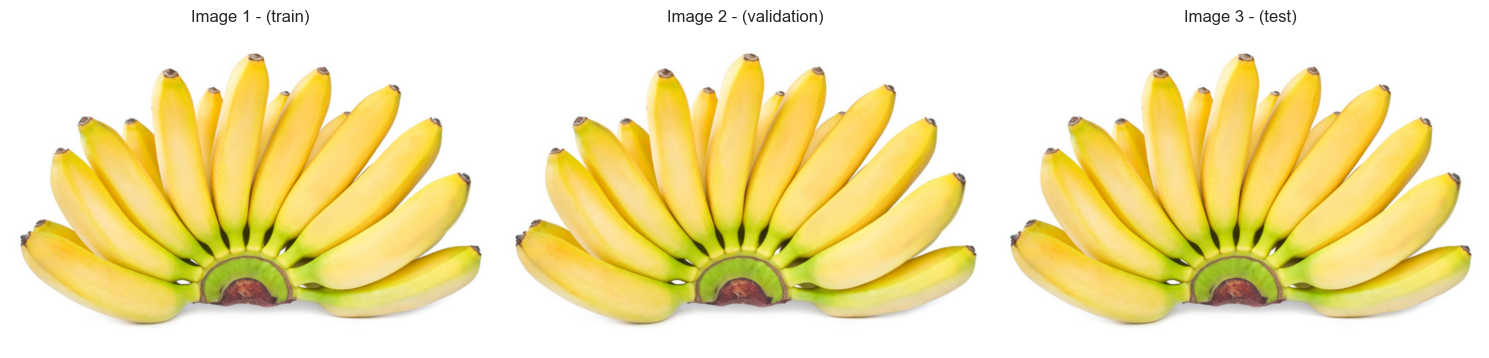

In [96]:
image1 = cv2.imread('./fruit-and-vegetable-image-recognition\\train\\banana\\Image_8.jpg')
image2 = cv2.imread('./fruit-and-vegetable-image-recognition\\validation\\banana\\Image_8.jpg')
image3 = cv2.imread('./fruit-and-vegetable-image-recognition\\test\\banana\\Image_8.jpg')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Convert from BGR (OpenCV format) to RGB (Matplotlib format)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

# Display the first image
axes[0].imshow(image1_rgb)
axes[0].axis('off')  # Remove axes
axes[0].set_title('Image 1 - (train)')

# Display the second image
axes[1].imshow(image2_rgb)
axes[1].axis('off')  # Remove axes
axes[1].set_title('Image 2 - (validation)')

# Display the third image
axes[2].imshow(image3_rgb)  # Corrected to axes[2]
axes[2].axis('off')  # Remove axes
axes[2].set_title('Image 3 - (test)')

# Display the images
plt.tight_layout()
plt.show()


### **7.3 - Apresentar Tabela com Informações Gerais de Duplicatas no Dataset  (Train, Validation e Test)**

In [104]:
# General Quantity (Entire Dataset) of Duplicates by Category

# Calculate the total number of images per category
label_counts = df.groupby('category_folder')['img_dir'].count().reset_index()
label_counts.rename(columns={'category_folder': 'Fruit or Vegetable', 'img_dir': 'Count'}, inplace=True)

# Calculate the number of duplicates per category
duplicated_counts = df_duplicated.groupby('category_folder')['img_hash'].count().reset_index()
duplicated_counts.rename(columns={'category_folder': 'Fruit or Vegetable', 'img_hash': 'Duplicates'}, inplace=True)

# Combine the information into a new table
final_table = label_counts.copy()  # Starts with the total number of images
final_table['Duplicates'] = 0  # Initialize the 'Duplicates' column with "0" (Zero)

# Add the number of duplicates for each category
for index, row in duplicated_counts.iterrows():
    fruit_or_vegetable = row['Fruit or Vegetable']
    duplicates = row['Duplicates']
    final_table.loc[final_table['Fruit or Vegetable'] == fruit_or_vegetable, 'Duplicates'] = duplicates

# Calculate the percentage of duplicates
final_table['Percentage'] = (final_table['Duplicates'] / final_table['Count']) * 100

# Format the 'Percentage' column with two decimal places and the '%' symbol
final_table['Percentage'] = final_table['Percentage'].map(lambda x: "{:.2f}%".format(x))

# Highlight rows with duplicate percentage above 25%
def highlight_duplicates(row):
    '''
    Highlights entire row in bold and red if the 'Percentage' column value is greater than 10%.
    '''
    percentage_str = row['Percentage']
    percentage_num = float(percentage_str.rstrip('%'))  # Remove '%' and convert to float

    if percentage_num > 25:
        return ['font-weight: bold; color: green'] * len(row)  # Apply bold and green color
    else:
        return [''] * len(row)  # Apply no style


# Apply the styling to the entire DataFrame, row-wise
styled_table = final_table.style.apply(highlight_duplicates, axis=1)

# Display the styled table
display(styled_table)


### **7.4 - Apresentar Gráfico com Quantidade Total de Duplicatas por categoria (incluido Train, Validation e Test)**

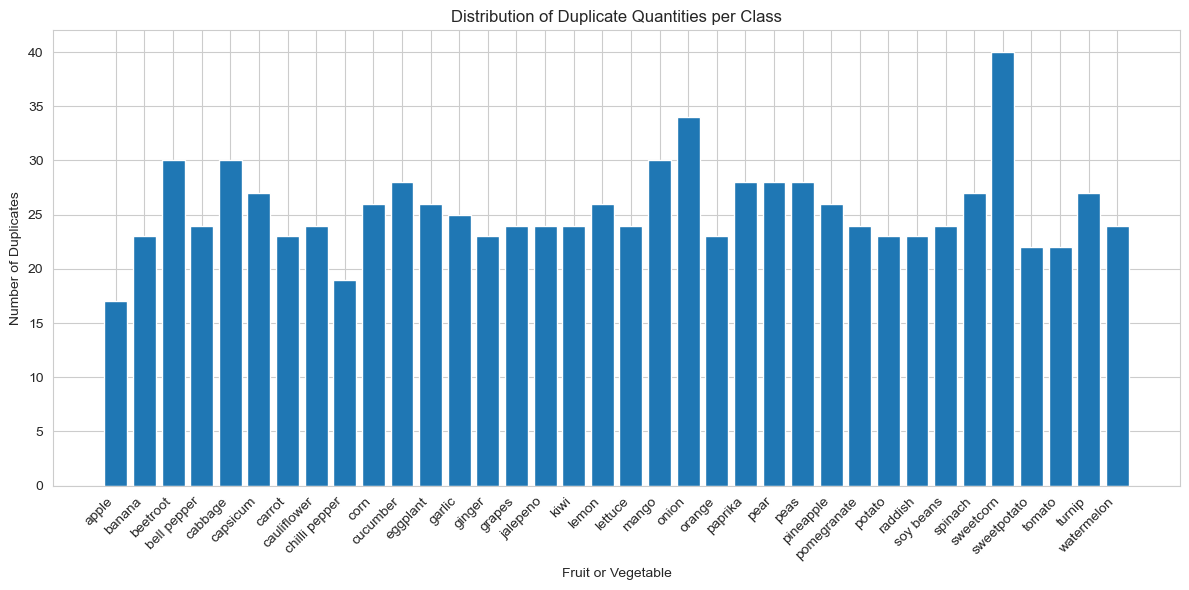

In [106]:
# Total Number of Duplicates per Category (including train, validation, and test)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(final_table['Fruit or Vegetable'], final_table['Duplicates']) # Create bar plot with categories on x-axis and duplicate counts on y-axis
plt.xlabel('Fruit or Vegetable') # Set x-axis label
plt.ylabel('Number of Duplicates') # Set y-axis label
plt.title('Distribution of Duplicate Quantities per Class') # Set plot title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show() # Display the plot

---

# **Conclusão das análises:**
**1.	Integridade dos Arquivos:**

- **Verificação de Existência:** Analisamos um total de 3824 imagens, todas presentes no diretório e no arquivo de informações. Embora o autor do Dataset mencione 3600 imagens, a média real é de 106 imagens por classe, com uma ligeira variação, que será discutida adiante.
-	**Formato de Arquivos:** Cerca de 92,4% das imagens estão no formato JPG, enquanto PNG (5,8%), JPEG (1,8%) e outros compõem o restante. A maioria dos arquivos está em formato consistente.

<br>

**2.	Consistência dos Metadados:**

-	**Valores Ausentes:** Não foram encontrados valores ausentes nos rótulos, garantindo que todas as imagens estejam devidamente categorizadas.
-	**Dimensões das Imagens:** Apenas 7% das imagens seguem um padrão de resolução, enquanto 93% possuem dimensões diversas. Isso pode impactar o modelo de classificação, sugerindo a necessidade de redimensionamento e padronização de todas as imagens.

<br>

**3.	Qualidade das Imagens:**

- **Imagens Corrompidas:** Apenas 1 imagem foi identificada como corrompida e será removida do dataset.
-	**Análise Visual:** A maioria das imagens possui boa resolução e clareza, favorecendo a extração de características pelo modelo.

<br>

**4.	Distribuição das Classes:**

-	**Análise de Distribuição:** Há um leve desbalanceamento entre as classes, como "apple" com 88 imagens e "sweetcorn" com 111, sendo que 40 dessas últimas são duplicadas. A média de imagens por classe é 106, com uma variação média de 16 para mais ou para menos.
- **Impacto do Desbalanceamento:** O desequilíbrio pode prejudicar a performance do modelo. Contudo, a exclusão ou remanejamento de duplicatas pode ajudar a balancear o número de exemplos por classe e melhorar o desempenho e generalização do modelo.

<br>

**5.	Duplicatas:**
-	**Identificação de Imagens Duplicadas:** Foram detectadas 211 duplicatas na pasta de treino (train), 26 duplicatas na pasta de validação (validation) e 26 duplicatas na pasta de teste (test) utilizando hash perceptual. Essas duplicatas serão removidas ou remanejadas para evitar viés durante o treinamento.
- **Verificação nos Metadados:** Não foram identificadas duplicatas nos metadados, garantindo que cada imagem tem um único rótulo.

<br>

**Nas proximas etapas de desenvolvimento serão devidamente abordadas quais as melhores técnicas e rotinas para o tratamento dos dados e suas possiveis  inconsistências.**

---

# <font color='magenta'>**ETAPA 02.**</font>
![image](https://github.com/user-attachments/assets/dd06ab85-4ccf-4666-9f8e-2b566572cda9)


#### **Nesta Etapa o desafio foi analisar Métodos da Literatura e apresentar ideias de melhorias.**


**- O Notebook que analisamos o Autor utilizou a Arquitetura MobileNetV2**
<br>

👉 [![Kaggle](https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white)](https://www.kaggle.com/code/nimapourmoradi/fruits-and-vegetables-image-mobilenetv2/notebook) 👈

### **MobileNetV2**

A MobileNetV2 é uma arquitetura de rede neural convolucional (CNN) projetada para ser leve e eficiente, tornando-a adequada para dispositivos móveis e embarcados. Ela foi desenvolvida pelo Google e é uma versão melhorada da MobileNetV1.


A MobileNetV2 introduz duas características principais:

- Blocos Residuais Invertidos: Esses blocos usam convoluções de profundidade para filtrar recursos e convoluções pontuais para combinar esses recursos. A estrutura invertida auxilia na manutenção da potência representacional com menos parâmetros.

- Expansão Linear com Conexões Residuais: A MobileNetV2 usa expansão linear nas camadas intermediárias, seguida por conexões residuais para melhorar o fluxo de informações.

### **Aplicações:**

A MobileNetV2 é melhor empregada em tarefas de visão computacional onde a eficiência e o baixo consumo de memória são cruciais, como:
- Classificação de imagens: Reconhecer objetos em imagens em tempo real.
- Detecção de objetos: Localizar e identificar objetos em imagens ou vídeos.
- Segmentação semântica: Dividir uma imagem em diferentes regiões com base na classe do objeto.
- Rastreamento de objetos: Seguir o movimento de um objeto em um vídeo.
- Super-resolução: Aumentar a resolução de uma imagem.
- Geração de imagens: Criar novas imagens com base em dados de treinamento.
- Reconhecimento facial: Identificar rostos em imagens ou vídeos.

### **Vantagens:**

- Leve e eficiente: Requer menos recursos computacionais e de memória em comparação com outras CNNs.
- Alta precisão: Fornece bom desempenho em uma variedade de tarefas de visão computacional.
- Rápida inferência: Processa imagens rapidamente, tornando-a adequada para aplicações em tempo real.
- Fácil de implantar: Pode ser facilmente implantado em dispositivos móveis e embarcados.

### **Limitações:**

- Menos preciso em tarefas complexas: Pode não ser tão preciso quanto CNNs maiores e mais complexas em tarefas desafiadoras.
- Sensível a mudanças na resolução: O desempenho pode ser afetado por mudanças na resolução da imagem de entrada.

Em resumo, a MobileNetV2 é uma arquitetura de CNN eficiente e leve que é adequada para uma variedade de aplicações de visão computacional, especialmente em dispositivos móveis e embarcados. Sua arquitetura invertida residual e expansão linear com conexões residuais permitem que ela atinja alta precisão com menos recursos. No entanto, pode não ser tão preciso quanto CNNs maiores e mais complexas em tarefas desafiadoras.

---
# **Inferências após analisar e rodar os códigos:**
-  **1) Foi verificado que o Autor não considerou a remoção das duplicatas na parte de pré-processamento das imagens e mesmo assim o modelo performou com uma acurácia média de 97% entre as categorias e manteve uma precisão de 100% em 29 das 36 classes (80%) do Dataset e isso nos deixou intrigados:**
    - **Este resultado inesperado será explicado melhor mais para frente.**
    
<br>

- **2) Após o treinamento (2h46min.) fomos realizar a conversão dos resultados do modelo em Dataframe e para nossa surpresa os dados dos arrays não tinham o mesmo comprimento.**

    `"ValueError: All arrays must be of the same length"`


<br>

#### **Resultados:**

![image](https://github.com/user-attachments/assets/7bfa6e2b-587e-470b-8108-27bf80e5e5ae)

<br>

#### **Percebemos que durante as épocas de treinamento os valores de accuracy e loss estavam treinando de forma intercalada, uma época computava os dados do modelo e a seguinte aparecia com valores de acuracia e perda zerados, assim sucessivamente conforme as épocas avançavam e isso não é algo esperado.**

![image](https://github.com/user-attachments/assets/242f928a-8ada-462e-a717-c337b60403a7)

### - Com esse resultado verificou-se que o modelo estava treinando em apenas metade das épocas de forma intercalada.

---
# **Algumas inferências e possíveis causas que foram levantadas:**

**1) Interrupções no treinamento:**
- Esses valores podem indicar que o treinamento foi interrompido em algumas épocas e, nesses casos, os valores para accuracy e loss não foram computados corretamente, resultando em zero.

<br>

**2) Problema com o callback:**
- A utilização Callbacks (como LearningRateScheduler ou ReduceLROnPlateau), eles podem causar a interrupção temporária do cálculo de accuracy e loss, especialmente se forem configurados para modificar o comportamento do treinamento em certas épocas.

<br>

**3) Problema de implementação no código de treinamento:**
- Possibilidade de que haja alguma configuração ou erro no loop de treinamento que faz com que o modelo não compute accuracy e loss em todas as épocas.

<br>

---

## **Outra possibilidade foi verificar se o Data Generator / Augmentation estavam provisionando as imagens corretamente as suas respectivas Labels.**

#### **Verificamos que o DataGenerator estava criando imagens que não correspondiam a suas reais Labels:**
![image](https://github.com/user-attachments/assets/b9718d99-5a30-4ba5-819b-5c1d6a5a621d)

#### **Tabela com a identificação das Imagens e Labels geradas:**
![image](https://github.com/user-attachments/assets/78c0fcd8-90fa-4870-9c51-933bbdb4ef5c)


---
# **Conclusões: EDITAR**

- Com essas informações levantadas durante a análise do método utilizado pelo autor deste Notebook em questão, decidimos que iriamos trabalhar primeiramente o processamento das imagens duplicadas (que não foram consideradas pelo autor) para entender se há suspeita de Overfitting e somente depois seguir com o treinamento sem a utilização do Data Generator.

<br>

---

# <font color='magenta'>**ETAPA 03.**</font>
![image](https://github.com/user-attachments/assets/dd06ab85-4ccf-4666-9f8e-2b566572cda9)


#### **Nesta Etapa iremos apresentar o Modelo Final do Notebook com as considerações de metodologias analisadas e inclusão de melhorias**

### **1 - Baixar o Dataset do Kaggle**

In [ ]:
# Installing Libraries
%pip install opendatasets
%pip install pandas
%pip install imagehash
%pip install opencv-python
%pip install termcolor
%pip install tensorflow
%pip install pydot
%pip install graphviz
pip install Jinja2



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Download Kaggle Dataset
import opendatasets as od
import pandas

od.download("https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition


100%|██████████| 1.98G/1.98G [01:16<00:00, 27.9MB/s]

### **1.1 - Importar Bibliotecas**

In [3]:
#%pip install silence_tensorflow

# A function to avoid tensorflow warnings
from silence_tensorflow import silence_tensorflow
silence_tensorflow()

In [ ]:
# Important Libraries for data conversion into Dataframe and Model Training

import os
import cv2
import random
import warnings
import graphviz
import imagehash

import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
from termcolor import colored

import tensorflow
from tensorflow import keras
from keras.utils import plot_model
from tensorflow.keras import optimizers
from tensorflow.keras import models, layers
from tensorflow.keras.applications import MobileNetV3Large
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

#%matplotlib inline
import matplotlib.pyplot as plt


In [5]:
'''
- Set the seaborn plot style to "darkgrid" for better visualization.
- This creates a dark background with a white grid for the plots.
'''
sns.set_style('darkgrid')

'''
- Suppress warning messages to keep the output clean.
- Note: Use this with caution as it might hide important information.
'''
warnings.filterwarnings('ignore')


### **1.2 - Atrbuição de caminhos para um Diretório e Pastas**

In [6]:
# Assigning a path to a directory
base_dir = './fruit-and-vegetable-image-recognition'


# assigning directory folders
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

### **2 - Criar um Dataframe com os metadados das imagens**

In [7]:
# Define the data directories
base_dir = './fruit-and-vegetable-image-recognition'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

# List of directories to iterate through
data_dirs = [train_dir, validation_dir, test_dir]

# Initialize the list to store image information
dataframe_list = list()

# Initialize corrupted image counter and list
count_corrupted = 0
corrupted = list()

# Main loop to iterate through data directories (train, validation, test)
for data_dir in data_dirs:
    # Get the current folder name (train, validation, or test)
    folder_name = os.path.basename(data_dir)

    # Loop to iterate through category folders (Labels) within the current data directory
    for category_folder in os.listdir(data_dir):
        category_path = os.path.join(data_dir, category_folder)

        # Loop to iterate through images within the category folder
        for image in os.listdir(category_path):
            # Create the full path to the image
            img_dir = os.path.join(category_path, image)

            # Check if the filename has an extension before splitting
            if '.' in image:
                _, image_format = image.split('.')
            else:
                image_format = None

            # Load the image using OpenCV
            img = cv2.imread(img_dir)

            # Check if the image was loaded correctly
            if img is not None:
                # Convert the image to RGB
                img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                # Convert the image to Pillow format
                img_pil = Image.fromarray(img_rgb)

                # Generate the perceptual hash of the image
                img_hash = imagehash.phash(img_pil)

                # Extract the width, height, and number of channels of the image
                width, height, channels = img.shape

                # Mark the image as not corrupted
                img_corrupted = False
            else:
                # Increment the corrupted image counter
                count_corrupted += 1

                # Add the path of the corrupted image to the list
                corrupted.append(img_dir)

                # Mark the image as corrupted and set attributes to None
                img_corrupted = True
                img_hash, image_format, width, height, channels = None, None, None, None, None

            # Add image information to the main list, including folder name and category
            dataframe_list.append([img_dir, img_corrupted, img_hash, image_format,
                                  width, height, channels, folder_name, category_folder])

print(f"Total corrupted images: {count_corrupted}")
print(f"List of corrupted images: {corrupted}")

Total corrupted images: 1
List of corrupted images: ['./fruit-and-vegetable-image-recognition\\train\\bell pepper\\Image_56.jpg']


In [8]:
# TRYING TO VISUALIZE THE IMAGE MARKED AS CORRUPT

# Path to the corrupted image
img_path = corrupted[0]  # Using the first item in the 'corrupted' list as an example

# Attempt to load the image using OpenCV
img = cv2.imread(img_path)

# If the image was loaded (even if corrupted)
if img is not None:
    # Display the image using Matplotlib
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Converting to RGB
    plt.title("Corrupted Image")
    plt.show()
else:
    print(f"Could not load the image: {img_path}")

Could not load the image: ./fruit-and-vegetable-image-recognition\train\bell pepper\Image_56.jpg


### **2.1 - Comparação de Imagens - Corrompida x Não Corrompida**

#### **- In the source of data origin, the image indicated as corrupted has a much smaller dimension than the others:**

<br>

# <font color='magenta'>**CORRUPTED IMAGE:**</font>
![image](https://github.com/user-attachments/assets/c987b234-a2c6-41cb-bcea-c743ce6189d7)  

<br>

# <font color='magenta'>**OTHER IMAGES HAVE THIS STANDARD SIZE:**</font>
![image](https://github.com/user-attachments/assets/778771e4-d898-4c03-86e5-863742e28e85)

### **2.2 - Criando Data Frame e Analisando algumas Linhas**

In [9]:
'''
img_dir: Path to the image file.
img_corrupted: Indicates whether the image is corrupted (True/False).
img_hash: Perceptual hash of the image.
image_format: Image file format (e.g. JPG, PNG).
width: Width of the image in pixels.
height: Image height in pixels.
channels: Number of color channels in the image (ex: 3 for RGB).
folder_name: Name of the folder
category_folder: Label or class of the image (ex: apple).
'''

df = pd.DataFrame(columns=['img_dir', 'img_corrupted', 'img_hash', 'image_format', 'width', 'height', 'channels', 'folder_name', 'category_folder'], data = dataframe_list)


df.head()

img_dir  img_corrupted  \
0  ./fruit-and-vegetable-image-recognition\train\...          False   
1  ./fruit-and-vegetable-image-recognition\train\...          False   
2  ./fruit-and-vegetable-image-recognition\train\...          False   
3  ./fruit-and-vegetable-image-recognition\train\...          False   
4  ./fruit-and-vegetable-image-recognition\train\...          False   

           img_hash image_format   width  height  channels folder_name  \
0  e1cf963493639c38          jpg  2216.0  2218.0       3.0       train   
1  e99c96789d653826          jpg  1200.0  1200.0       3.0       train   
2  ed9b904ccf311c65          jpg   249.0   250.0       3.0       train   
3  aaeaccc3d8dd5203          jpg   800.0  1200.0       3.0       train   
4  b49c939c1e6ccccc          jpg   720.0  1280.0       3.0       train   

  category_folder  
0           apple  
1           apple  
2           apple  
3           apple  
4           apple

### **3 - Verificar a Integridade dos Arquivos**

In [10]:
# Statistical information on image height, width and channel values

df.describe().loc[['mean', 'std', 'min', 'max']]

width       height  channels
mean  1132.983787  1358.873169       3.0
std    807.650517   994.798972       0.0
min    147.000000   133.000000       3.0
max   6351.000000  7360.000000       3.0

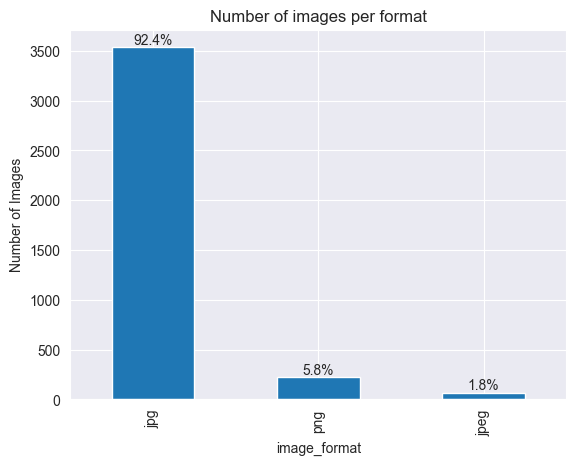

In [11]:
# Percentage of Images by Format (JPG, PNG, etc.)

# Convert the 'image_format' column to lowercase
df['image_format'] = df['image_format'].str.lower()

# Calculate the count of images per format and the percentages
format_counts = df['image_format'].value_counts()
total_images = format_counts.sum()
format_percentages = (format_counts / total_images) * 100

# Create the bar chart
ax = format_counts.plot(kind='bar', title='Number of images per format')

# Add percentages above the bars
for i, v in enumerate(format_counts):
    ax.text(i, v + 0.5, f'{format_percentages.iloc[i]:.1f}%', ha='center', va='bottom')

# Adjust the y-axis labels
ax.set_ylabel('Number of Images')

# Display the chart
plt.show()

### **4 - Verificar a Consistência dos Metadados**

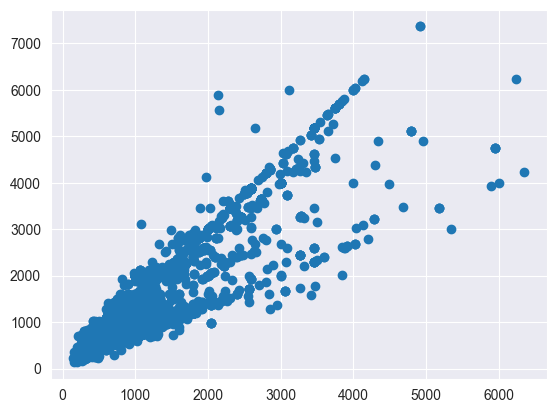

In [12]:
# Distribution of Height and Width Dimensions of Images

plt.scatter(df['width'], df['height'])

### **5 - Verificar a Presença de Duplicatas**

In [13]:
# Number of duplicate images in each Folder (train, validation and test)

# Function to calculate information for each folder
def get_folder_info(df, folder_name):
    folder_df = df[df['folder_name'] == folder_name]  # Filter DataFrame for the specified folder
    total_count = len(folder_df)  # Calculate total image count in the folder
    duplicate_count = folder_df['img_hash'].duplicated().sum()  # Calculate duplicate image count using image hashes
    return folder_name, total_count, duplicate_count  # Return the folder information

# Getting information for each folder
train_info = get_folder_info(df, 'train')  # Get information for the 'train' folder
validation_info = get_folder_info(df, 'validation')  # Get information for the 'validation' folder
test_info = get_folder_info(df, 'test')  # Get information for the 'test' folder

# Creating the table
data = [train_info, validation_info, test_info]  # Store folder information in a list
summary_table = pd.DataFrame(data, columns=['Folder', 'Total Quantity', 'Repeated Images'])  # Create DataFrame from the list

print(summary_table)

       Folder  Total Quantity  Repeated Images
0       train            3115              221
1  validation             351               26
2        test             359               26


### **5.1 - Agrupar Imagens Duplicatas e Mostrar o Dicionário**

In [14]:
'''
Scroll through duplicate images, find all images
with the same hash and groups them in a dictionary, facilitating identification
and access to all copies of a duplicate image.
'''
# Defining df_duplicated to include rows with duplicate 'img_hash' values
df_duplicated = df[df['img_hash'].duplicated(keep=False)]

duplicated_images = {}
for i in range(df_duplicated.shape[0]):
  hash_duplicated = df_duplicated.iloc[i]['img_hash']
  duplicated = df[df['img_hash'] == hash_duplicated]["img_dir"].values
  duplicated_images[str(hash_duplicated)] = duplicated.tolist()



# Images corresponding to each duplicate image
duplicated_images

{'e1cf963493639c38': ['./fruit-and-vegetable-image-recognition\\train\\apple\\Image_1.jpg',
  './fruit-and-vegetable-image-recognition\\validation\\apple\\Image_1.jpg',
  './fruit-and-vegetable-image-recognition\\validation\\apple\\Image_10.jpg',
  './fruit-and-vegetable-image-recognition\\test\\apple\\Image_1.jpg',
  './fruit-and-vegetable-image-recognition\\test\\apple\\Image_10.jpg'],
 'c59892c9c9676766': ['./fruit-and-vegetable-image-recognition\\train\\apple\\Image_2.jpg',
  './fruit-and-vegetable-image-recognition\\validation\\apple\\Image_2.jpg',
  './fruit-and-vegetable-image-recognition\\test\\apple\\Image_2.jpg'],
 'be81c16ca47a8f6a': ['./fruit-and-vegetable-image-recognition\\train\\apple\\Image_3.jpg',
  './fruit-and-vegetable-image-recognition\\validation\\apple\\Image_3.jpg',
  './fruit-and-vegetable-image-recognition\\test\\apple\\Image_3.jpg'],
 '95c4223fbbd4c552': ['./fruit-and-vegetable-image-recognition\\train\\apple\\Image_5.JPG',
  './fruit-and-vegetable-image-reco

### **5.2 - Plotar Imagens Agrupadas de cada Pasta (Train, Validation e Test)**

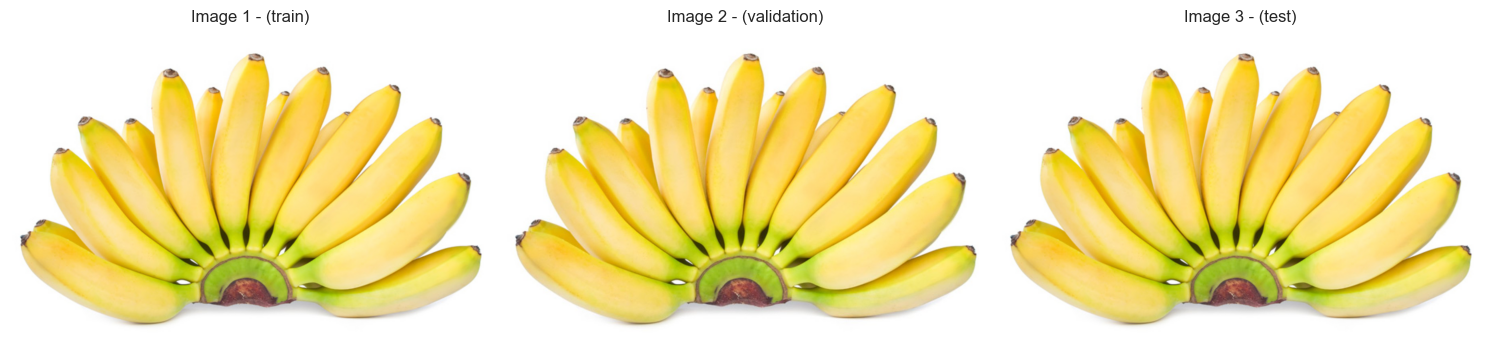

In [15]:
image1 = cv2.imread('./fruit-and-vegetable-image-recognition\\train\\banana\\Image_8.jpg')
image2 = cv2.imread('./fruit-and-vegetable-image-recognition\\validation\\banana\\Image_8.jpg')
image3 = cv2.imread('./fruit-and-vegetable-image-recognition\\test\\banana\\Image_8.jpg')

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Convert from BGR (OpenCV format) to RGB (Matplotlib format)
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3_rgb = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)

# Display the first image
axes[0].imshow(image1_rgb)
axes[0].axis('off')  # Remove axes
axes[0].set_title('Image 1 - (train)')

# Display the second image
axes[1].imshow(image2_rgb)
axes[1].axis('off')  # Remove axes
axes[1].set_title('Image 2 - (validation)')

# Display the third image
axes[2].imshow(image3_rgb)  # Corrected to axes[2]
axes[2].axis('off')  # Remove axes
axes[2].set_title('Image 3 - (test)')

# Display the images
plt.tight_layout()
plt.show()


### **5.3 - Apresentar Tabela com Informações Gerais de Duplicatas no Dataset  (Train, Validation e Test)**

In [88]:

# General Quantity (Entire Dataset) of Duplicates by Category

# Calculate the total number of images per category
label_counts = df.groupby('category_folder')['img_dir'].count().reset_index()
label_counts.rename(columns={'category_folder': 'Fruit or Vegetable', 'img_dir': 'Count'}, inplace=True)

# Calculate the number of duplicates per category
duplicated_counts = df_duplicated.groupby('category_folder')['img_hash'].count().reset_index()
duplicated_counts.rename(columns={'category_folder': 'Fruit or Vegetable', 'img_hash': 'Duplicates'}, inplace=True)

# Combine the information into a new table
final_table = label_counts.copy()  # Starts with the total number of images
final_table['Duplicates'] = 0  # Initialize the 'Duplicates' column with "0" (Zero)

# Add the number of duplicates for each category
for index, row in duplicated_counts.iterrows():
    fruit_or_vegetable = row['Fruit or Vegetable']
    duplicates = row['Duplicates']
    final_table.loc[final_table['Fruit or Vegetable'] == fruit_or_vegetable, 'Duplicates'] = duplicates

# Calculate the percentage of duplicates
final_table['Percentage'] = (final_table['Duplicates'] / final_table['Count']) * 100

# Format the 'Percentage' column with two decimal places and the '%' symbol
final_table['Percentage'] = final_table['Percentage'].map(lambda x: "{:.2f}%".format(x))

# Highlight rows with duplicate percentage above 25%
def highlight_duplicates(row):
    '''
    Highlights entire row in bold and red if the 'Percentage' column value is greater than 10%.
    '''
    percentage_str = row['Percentage']
    percentage_num = float(percentage_str.rstrip('%'))  # Remove '%' and convert to float

    if percentage_num > 35:
        return ['font-weight: bold; color: green'] * len(row)  # Apply bold and green color
    else:
        return [''] * len(row)  # Apply no style


# Apply the styling to the entire DataFrame, row-wise
styled_table = final_table.style.apply(highlight_duplicates, axis=1)

# Display the styled table
display(styled_table)


### **5.4 - Apresentar Gráfico com Quantidade Total de Duplicatas por categoria (incluido Train, Validation e Test)**

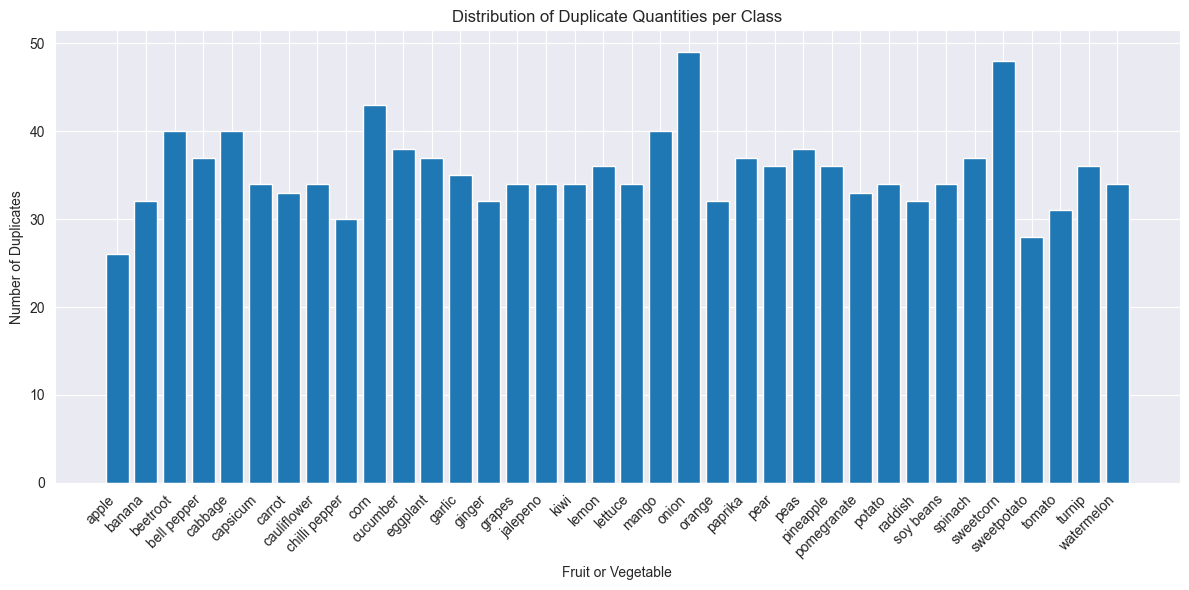

In [17]:
# Total Number of Duplicates per Category (including train, validation, and test)

# Plotting the bar chart
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.bar(final_table['Fruit or Vegetable'], final_table['Duplicates']) # Create bar plot with categories on x-axis and duplicate counts on y-axis
plt.xlabel('Fruit or Vegetable') # Set x-axis label
plt.ylabel('Number of Duplicates') # Set y-axis label
plt.title('Distribution of Duplicate Quantities per Class') # Set plot title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show() # Display the plot

# **ETAPA 3 - MELHORIAS NO MODELO**

## **ETAPA 3.1 - MODELO VERSÃO 1**

In [18]:
# Create training, test, and validation DataFrames from the original DataFrame.
df_treino = df[df['folder_name'] == 'train'].copy()
df_teste = df[df['folder_name'] == 'test'].copy()
df_val = df[df['folder_name'] == 'validation'].copy()


### **1 - Eliminação e Verificação de Duplicatas no Conjunto de Treino**

In [19]:
N_duplicatas_tr=df_treino['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de treino: {N_duplicatas_tr}')

Número de imagens duplicadas no conjunto de treino: 221


In [20]:
# Create a new DataFrame to store unique hashes per class
dfs = []

# Iterate through each class in the DataFrame
for classe, grupo in df_treino.groupby('category_folder'):  
    # Select the unique hashes within the class
    hashes_unicos = grupo['img_hash'].unique()  
    # Filter the original group to keep only the first occurrences of the unique hashes
    grupo_filtrado = grupo[grupo['img_hash'].isin(hashes_unicos)].drop_duplicates(subset='img_hash')  
    dfs.append(grupo_filtrado)  # Append the filtered group to the list of DataFrames

# Concatenate the results into a single DataFrame
df_no_dupli = pd.concat(dfs, ignore_index=True)  # Concatenate all filtered DataFrames, resetting the index

In [21]:
# Calculate and print the number of duplicated image hashes in the training set.
N_duplicatas_tr_NO=df_no_dupli['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de treino: {N_duplicatas_tr_NO}')

Número de imagens duplicadas no conjunto de treino: 19


### **1.1 - Verificação das duplicatas entre classes (treino)**

In [22]:
# Create a copy and convert image hash to string for grouping.
df_no_dupli_v2 = df_no_dupli.copy()
df_no_dupli_v2['image_hash_str'] = df_no_dupli_v2['img_hash'].astype(str)

# Identify hashes present in multiple categories.
multi_class_hashes_v2 = df_no_dupli_v2.groupby('image_hash_str')['category_folder'].nunique().reset_index(name='num_classes')
multi_class_hashes_v2 = multi_class_hashes_v2[multi_class_hashes_v2['num_classes'] > 1]['image_hash_str']

# Mark images present in multiple categories and remove temporary column.
df_no_dupli_v2['imagem em 2 classes'] = df_no_dupli_v2['image_hash_str'].isin(multi_class_hashes_v2).map({True: 's', False: 'n'})  # Using isin and map for conciseness
df_no_dupli_v2.drop(columns='image_hash_str', inplace=True)

# Summarize and display the duplicate information.
duplicate_summary = df_no_dupli_v2[df_no_dupli_v2['imagem em 2 classes'] == 's'].groupby('category_folder')['imagem em 2 classes'].count().reset_index()
unique_counts = df_no_dupli.groupby('category_folder')['img_hash'].nunique().reset_index(name='Imagens unicas na classe')
final_summary = unique_counts.merge(duplicate_summary, on='category_folder', how='left').sort_values(by='imagem em 2 classes', ascending=False).dropna(subset=['imagem em 2 classes'])

# Display the final summary table
display(final_summary)

category_folder  Imagens unicas na classe  imagem em 2 classes
9             corn                        81                 11.0
31       sweetcorn                        82                 11.0
3      bell pepper                        84                  5.0
5         capsicum                        86                  4.0
8    chilli pepper                        86                  2.0
15        jalepeno                        85                  2.0
22         paprika                        76                  1.0
27          potato                        72                  1.0
32     sweetpotato                        66                  1.0

In [23]:
from itertools import combinations

# This code block identifies and analyzes duplicate images across different classes.
df_no_dupli_v2 = df_no_dupli.copy()
df_no_dupli_v2['image_hash_str'] = df_no_dupli_v2['img_hash'].astype(str)
hash_to_classes = df_no_dupli_v2.groupby('image_hash_str')['category_folder'].apply(list).reset_index(name='category_folder')
multi_class_hashes = hash_to_classes[hash_to_classes['category_folder'].apply(len) > 1]
duplicated_pairs = []

# Iterate over each hash with duplicates
for _, row in multi_class_hashes.iterrows():
    image_hash = row['image_hash_str']
    classes = row['category_folder']

    # Create unique pairs of classes
    class_pairs = list(combinations(classes, 2))

    # For each pair, find the indices in the original DataFrame
    for class_a, class_b in class_pairs:
        indices_a = df_no_dupli_v2[(df_no_dupli_v2['category_folder'] == class_a) &
                                   (df_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        indices_b = df_no_dupli_v2[(df_no_dupli_v2['category_folder'] == class_b) &
                                   (df_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()

        # Add all pairs of indices
        for idx_a in indices_a:
            for idx_b in indices_b:
                duplicated_pairs.append((img_hash, class_a, class_b, idx_a, idx_b))

# Convert the pairs into a DataFrame
df_pairs = pd.DataFrame(duplicated_pairs, columns=['img_hash', 'class_a', 'class_b', 'index_a', 'index_b'])
df_pairs

img_hash        class_a      class_b  index_a  index_b
0   afb9f03d8450a3d1           corn    sweetcorn      748     2579
1   afb9f03d8450a3d1           corn    sweetcorn      705     2584
2   afb9f03d8450a3d1           corn    sweetcorn      716     2519
3   afb9f03d8450a3d1           corn    sweetcorn      718     2530
4   afb9f03d8450a3d1         potato  sweetpotato     2230     2587
5   afb9f03d8450a3d1  chilli pepper     jalepeno      648     1252
6   afb9f03d8450a3d1    bell pepper      paprika      254     1825
7   afb9f03d8450a3d1  chilli pepper     jalepeno      642     1206
8   afb9f03d8450a3d1           corn    sweetcorn      768     2516
9   afb9f03d8450a3d1    bell pepper     capsicum      250      421
10  afb9f03d8450a3d1           corn    sweetcorn      717     2554
11  afb9f03d8450a3d1           corn    sweetcorn      781     2544
12  afb9f03d8450a3d1    bell pepper     capsicum      292      451
13  afb9f03d8450a3d1           corn    sweetcorn      709     2535
14  afb9f03d8450a3d1    bell pepper     capsicum      275      440
15  afb9f03d8450a3d1           corn    sweetcorn      715     2518
16  afb9f03d8450a3d1           corn    sweetcorn      727     2567
17  afb9f03d8450a3d1           corn    sweetcorn      772     2540
18  afb9f03d8450a3d1    bell pepper     capsicum      236      414

### **1.2 - Exclusão das duplicatas entre classes (treino)**

In [24]:
# Create a list to store all indices to drop
all_indices_to_drop = []

# Function to get indices and remove corresponding rows from df_pairs
def get_indices_and_remove_rows(df_pairs, condition_col, condition_val, index_col, num_rows):
    indices = df_pairs[df_pairs[condition_col] == condition_val][index_col].head(num_rows).tolist()
    df_pairs.drop(index=df_pairs[df_pairs[index_col].isin(indices)].index, inplace=True)  # Remove rows from df_pairs
    return indices

# Get indices and remove rows for each condition
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'corn', 'index_a', 5))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'sweetcorn', 'index_b', 6))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'capsicum', 'index_b', 4))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'chilli pepper', 'index_a', 2))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'potato', 'index_a', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'bell pepper', 'index_a', 1))

# Drop all indices at once from df_no_dupli_v2
df_no_dupli_v3 = df_no_dupli_v2.drop(index=all_indices_to_drop).copy()


### **1.3 - Confirmação da exclusão das duplicatas em classes diferentes (treino)**

In [25]:
# Calculate and print the number of duplicate images in the training set, before and after treatment.
N_duplicatas_tr=df_treino['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de treino original: {N_duplicatas_tr}')
N_duplicatas_tr=df_no_dupli_v3['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de treino após tratamento: {N_duplicatas_tr}')


Número de imagens duplicadas no conjunto de treino original: 221
Número de imagens duplicadas no conjunto de treino após tratamento: 0


### **1.4 - Comparativo do balanceamento antes e depois da exclusão de duplicatas da pasta treino**

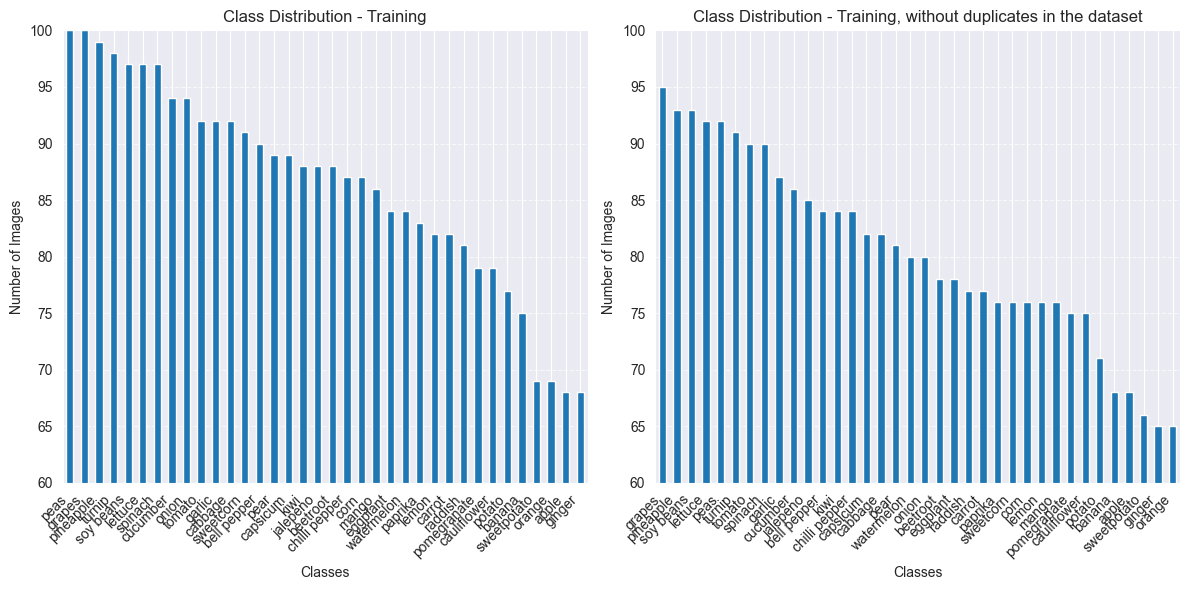

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Chart 1: Class Distribution - Training
df_treino['category_folder'].value_counts().plot(kind='bar', ax=ax1, title='Class Distribution - Training')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Number of Images')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Adjusting the Y-axis
ax1.set_ylim(60, 100)
ax1.set_yticks(range(60, 101, 5))  # Granularity of 10

# Adding grid lines
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Chart 2: Class Distribution - Training, without duplicates
df_no_dupli_v3['category_folder'].value_counts().plot(kind='bar', ax=ax2, title='Class Distribution - Training, without duplicates in the dataset')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Number of Images')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjusting the Y-axis
ax2.set_ylim(60, 100)
ax2.set_yticks(range(60, 101, 5))  # Granularity of 10

# Adding grid lines
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **2 - Eliminação e Verificação de Duplicatas no Conjunto de Validação**

In [27]:
N_duplicatas_tr=df_val['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de validação: {N_duplicatas_tr}')


Número de imagens duplicadas no conjunto de validação: 26


In [28]:
# Create a new DataFrame to store unique hashes per class
dfs = []

# Iterate through each class in the DataFrame
for classe, grupo in df_val.groupby('category_folder'):  
    # Select the unique hashes within the class
    hashes_unicos = grupo['img_hash'].unique()  
    # Filter the original group to keep only the first occurrences of the unique hashes
    grupo_filtrado = grupo[grupo['img_hash'].isin(hashes_unicos)].drop_duplicates(subset='img_hash')  
    dfs.append(grupo_filtrado)  # Append the filtered group to the list of DataFrames

# Concatenate the results into a single DataFrame
df_val_no_dupli = pd.concat(dfs, ignore_index=True)  # Concatenate all filtered DataFrames, resetting the index


In [29]:
# Calculate and print the number of duplicated image hashes in the training set.
N_duplicatas_tr_NO=df_val_no_dupli['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de validação após tratamento: {N_duplicatas_tr_NO}')

Número de imagens duplicadas no conjunto de validação após tratamento: 3


### **2.1 - Verificação das duplicatas entre classes (Validação)**

In [30]:
# Create a copy and convert image hash to string for grouping.
df_val_no_dupli_v2 = df_val_no_dupli.copy()
df_val_no_dupli_v2['image_hash_str'] = df_val_no_dupli_v2['img_hash'].astype(str)

# Identify hashes present in multiple categories.
multi_class_hashes_v2 = df_val_no_dupli_v2.groupby('image_hash_str')['category_folder'].nunique().reset_index(name='num_classes')
multi_class_hashes_v2 = multi_class_hashes_v2[multi_class_hashes_v2['num_classes'] > 1]['image_hash_str']

# Mark images present in multiple categories and remove temporary column.
df_val_no_dupli_v2['imagem em 2 classes'] = df_val_no_dupli_v2['image_hash_str'].isin(multi_class_hashes_v2).map({True: 's', False: 'n'})
df_val_no_dupli_v2.drop(columns='image_hash_str', inplace=True)

# Summarize and display the duplicate information.
duplicate_summary = df_val_no_dupli_v2[df_val_no_dupli_v2['imagem em 2 classes'] == 's'].groupby('category_folder')['imagem em 2 classes'].count().reset_index()
unique_counts = df_val_no_dupli_v2.groupby('category_folder')['img_hash'].nunique().reset_index(name='Imagens unicas na classe')
final_summary = unique_counts.merge(duplicate_summary, on='category_folder', how='left').sort_values(by='imagem em 2 classes', ascending=False).dropna(subset=['imagem em 2 classes'])

# Display the final summary table
display(final_summary)


category_folder  Imagens unicas na classe  imagem em 2 classes
31       sweetcorn                        10                  2.0
9             corn                        10                  2.0
5         capsicum                         9                  1.0
3      bell pepper                         7                  1.0

In [31]:
# Create a copy and convert image hashes to strings
df_val_no_dupli_v2 = df_val_no_dupli.copy()
df_val_no_dupli_v2['image_hash_str'] = df_val_no_dupli_v2['img_hash'].astype(str)

# Group hashes by category and find those in multiple categories
hash_to_classes = df_val_no_dupli_v2.groupby('image_hash_str')['category_folder'].apply(list).reset_index(name='category_folder')
multi_class_hashes = hash_to_classes[hash_to_classes['category_folder'].apply(len) > 1]

# Store duplicate image pairs
duplicated_pairs = []

# Iterate through multi-class hashes to find all duplicate pairs
for _, row in multi_class_hashes.iterrows():
    image_hash = row['image_hash_str']
    classes = row['category_folder']
    
    # Create unique class pairs
    for class_a, class_b in combinations(classes, 2):  
        # Find indices of duplicates in original DataFrame
        indices_a = df_val_no_dupli_v2[(df_val_no_dupli_v2['category_folder'] == class_a) & (df_val_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        indices_b = df_val_no_dupli_v2[(df_val_no_dupli_v2['category_folder'] == class_b) & (df_val_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        
        # Append all duplicate pairs to the list
        duplicated_pairs.extend([(image_hash, class_a, class_b, idx_a, idx_b) for idx_a in indices_a for idx_b in indices_b])  

# Create a DataFrame from the duplicate pairs
df_pairs = pd.DataFrame(duplicated_pairs, columns=['img_hash', 'class_a', 'class_b', 'index_a', 'index_b']) 
df_pairs

img_hash      class_a    class_b  index_a  index_b
0  87eda15658abc417         corn  sweetcorn       78      292
1  c5a63ef44460f38e  bell pepper   capsicum       32       48
2  d1f1e3870c8f1ec8         corn  sweetcorn       81      288

### **2.2 - Exclusão das duplicatas entre classes (Validação)**

In [32]:
# Create a list to store all indices to drop
all_indices_to_drop = []

# Function to get indices and remove corresponding rows from df_pairs
def get_indices_and_remove_rows(df_pairs, condition_col, condition_val, index_col, num_rows):
    indices = df_pairs[df_pairs[condition_col] == condition_val][index_col].head(num_rows).tolist()
    df_pairs.drop(index=df_pairs[df_pairs[index_col].isin(indices)].index, inplace=True)  # Remove rows from df_pairs
    return indices

# Get indices and remove rows for each condition
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'corn', 'index_a', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'sweetcorn', 'index_b', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'capsicum', 'index_b', 1))

# Drop all indices at once from df_val_no_dupli_v3
df_val_no_dupli_v3 = df_val_no_dupli_v2.drop(index=all_indices_to_drop).copy()


### **2.3 - Confirmação da exclusão das duplicatas em classes diferentes (Validação)**

In [33]:
# Calculate and print the number of duplicate images in the training set, before and after treatment.
N_duplicatas_tr=df_val['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de validação original: {N_duplicatas_tr}')
N_duplicatas_tr=df_val_no_dupli_v3['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de validação após tratamento: {N_duplicatas_tr}')


Número de imagens duplicadas no conjunto de validação original: 26
Número de imagens duplicadas no conjunto de validação após tratamento: 0


### **3 - Eliminação e Verificação de Duplicatas no Conjunto de Teste**

In [34]:
N_duplicatas_tr=df_teste['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de teste: {N_duplicatas_tr}')

Número de imagens duplicadas no conjunto de teste: 26

In [35]:
# Create a new DataFrame to store unique hashes per class
dfs = []

# Iterate through each class in the DataFrame
for classe, grupo in df_teste.groupby('category_folder'):
    # Select the unique hashes within the class
    hashes_unicos = grupo['img_hash'].unique()
    # Filter the original group to keep only the first occurrences of the unique hashes
    grupo_filtrado = grupo[grupo['img_hash'].isin(hashes_unicos)].drop_duplicates(subset='img_hash')
    dfs.append(grupo_filtrado)

# Concatenate the results into a single DataFrame
df_no_dupli = pd.concat(dfs, ignore_index=True)


In [36]:
# Calculate and print the number of duplicated image hashes in the training set.
N_duplicatas_tval_NO=df_no_dupli['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de teste: {N_duplicatas_tval_NO}')

Número de imagens duplicadas no conjunto de teste: 3


### **3.1 - Verificação das duplicatas entre classes (Teste)**

In [37]:
# Create a copy and convert image hash to string for grouping.
df_test_no_dup = df_no_dupli.copy()
df_test_no_dup['hash_str'] = df_test_no_dup['img_hash'].astype(str)

# Identify hashes present in multiple categories.
multi_class_hashes = df_test_no_dup.groupby('hash_str')['category_folder'].nunique().reset_index(name='num_classes')
multi_class_hashes = multi_class_hashes[multi_class_hashes['num_classes'] > 1]['hash_str']

# Mark images present in multiple categories and remove temporary column.
df_test_no_dup['in_2_classes'] = df_test_no_dup['hash_str'].isin(multi_class_hashes).map({True: 's', False: 'n'})
df_test_no_dup.drop(columns='hash_str', inplace=True)

# Summarize and display the duplicate information.
dup_counts = df_test_no_dup[df_test_no_dup['in_2_classes'] == 's'].groupby('category_folder')['in_2_classes'].count().reset_index()
unique_counts = df_no_dupli.groupby('category_folder')['img_hash'].nunique().reset_index(name='unique_images')
final_result = unique_counts.merge(dup_counts, on='category_folder', how='left').sort_values(by='in_2_classes', ascending=False).dropna(subset=['in_2_classes'])

# Display the final summary table
display(final_result)


category_folder  unique_images  in_2_classes
31       sweetcorn             10           2.0
9             corn             10           2.0
5         capsicum              9           1.0
3      bell pepper              8           1.0

In [38]:
# Create a copy and convert image hashes to strings
df_teste_no_dupli_v2 = df_no_dupli.copy()
df_teste_no_dupli_v2['image_hash_str'] = df_teste_no_dupli_v2['img_hash'].astype(str)

# Group hashes by category and identify those present in multiple categories
hash_to_classes = df_teste_no_dupli_v2.groupby('image_hash_str')['category_folder'].apply(list).reset_index(name='category_folder')
multi_class_hashes = hash_to_classes[hash_to_classes['category_folder'].apply(len) > 1]

# Store duplicate image pairs
duplicated_pairs = []

# Iterate through multi-class hashes to find all duplicate pairs
for _, row in multi_class_hashes.iterrows():
    image_hash = row['image_hash_str']
    classes = row['category_folder']
    
    # Create unique class pairs
    for class_a, class_b in combinations(classes, 2):  
        # Find indices of duplicates in the original DataFrame
        indices_a = df_teste_no_dupli_v2[(df_teste_no_dupli_v2['category_folder'] == class_a) & 
                                         (df_teste_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        indices_b = df_teste_no_dupli_v2[(df_teste_no_dupli_v2['category_folder'] == class_b) & 
                                         (df_teste_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        
        # Append all duplicate pairs to the list
        duplicated_pairs.extend([(image_hash, class_a, class_b, idx_a, idx_b) for idx_a in indices_a for idx_b in indices_b])

# Create a DataFrame from the duplicate pairs
df_pairs = pd.DataFrame(duplicated_pairs, columns=['img_hash', 'class_a', 'class_b', 'index_a', 'index_b'])
df_pairs


img_hash      class_a    class_b  index_a  index_b
0  87eda15658abc417         corn  sweetcorn       81      300
1  c5a63ef44460f38e  bell pepper   capsicum       33       49
2  d1f1e3870c8f1ec8         corn  sweetcorn       84      296

### **3.2 - Exclusão das duplicatas entre classes (Teste)**

In [39]:
# Create a list to store all indices to drop
all_indices_to_drop = []

# Function to get indices and remove corresponding rows from df_pairs
def get_indices_and_remove_rows(df_pairs, condition_col, condition_val, index_col, num_rows):
    indices = df_pairs[df_pairs[condition_col] == condition_val][index_col].head(num_rows).tolist()
    df_pairs.drop(index=df_pairs[df_pairs[index_col].isin(indices)].index, inplace=True)  # Remove rows from df_pairs
    return indices

# Get indices and remove rows for each condition
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'corn', 'index_a', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'sweetcorn', 'index_b', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'capsicum', 'index_b', 1))

# Drop all indices at once from df_teste_no_dupli_v3
df_teste_no_dupli_v3 = df_teste_no_dupli_v2.drop(index=all_indices_to_drop).copy()

### **3.3 - Confirmação da exclusão das duplicatas em classes diferentes (Teste)**

In [40]:
# Calculate and print the number of duplicate images in the training set, before and after treatment.
N_duplicatas_tval_NO=df_no_dupli['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de teste: {N_duplicatas_tval_NO}')
N_duplicatas_tval_NO=df_teste_no_dupli_v3['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de teste após o tratamento: {N_duplicatas_tval_NO}')

Número de imagens duplicadas no conjunto de teste: 3
Número de imagens duplicadas no conjunto de teste após o tratamento: 0


### **4 - Comparação conjunto de teste x todos**

In [41]:
# Create a copy of the training data for further processing
treino_out = df_no_dupli_v3.copy()  

# Create a copy of the validation data for further processing
validacao_out = df_val_no_dupli_v3.copy() 

# Extract the image hashes from the test data and store them in a variable
hashs_teste = df_teste_no_dupli_v3['img_hash']

### **4.1 - Imagens do set de validação que não estão presentes no set de teste**

In [42]:
# Select validation images that are not present in the test set
# by comparing their image hashes 
val_sem_hash_teste = validacao_out[~validacao_out['img_hash'].isin(hashs_teste)]  

# Check if the resulting DataFrame is empty
if val_sem_hash_teste.empty:
    print("All Images contained in the Validation set are the same as the Test set") 
else:
    # Display the resulting DataFrame containing the unique validation images
    display(val_sem_hash_teste)

All Images contained in the Validation set are the same as the Test set


### **4.2 - Imagens do set de treino que não estão presentes no set de teste**

In [43]:
# Select training images that are not present in the test set
# by comparing their image hashes
treino_out_v1 = treino_out[~treino_out['img_hash'].isin(hashs_teste)]  

# Display the resulting DataFrame containing the unique training images
treino_out_v1

img_dir  img_corrupted  \
1     ./fruit-and-vegetable-image-recognition\train\...          False   
2     ./fruit-and-vegetable-image-recognition\train\...          False   
3     ./fruit-and-vegetable-image-recognition\train\...          False   
4     ./fruit-and-vegetable-image-recognition\train\...          False   
5     ./fruit-and-vegetable-image-recognition\train\...          False   
...                                                 ...            ...   
2908  ./fruit-and-vegetable-image-recognition\train\...          False   
2909  ./fruit-and-vegetable-image-recognition\train\...          False   
2910  ./fruit-and-vegetable-image-recognition\train\...          False   
2911  ./fruit-and-vegetable-image-recognition\train\...          False   
2912  ./fruit-and-vegetable-image-recognition\train\...          False   

              img_hash image_format   width  height  channels folder_name  \
1     e99c96789d653826          jpg  1200.0  1200.0       3.0       train   
2     ed9b904ccf311c65          jpg   249.0   250.0       3.0       train   
3     aaeaccc3d8dd5203          jpg   800.0  1200.0       3.0       train   
4     b49c939c1e6ccccc          jpg   720.0  1280.0       3.0       train   
5     b04fb16c4b64c9f2          jpg  1840.0  1200.0       3.0       train   
...                ...          ...     ...     ...       ...         ...   
2908  83e1ccd4970f3e1c          jpg  1884.0  2223.0       3.0       train   
2909  cec9a47cc62dc075          jpg   683.0  1024.0       3.0       train   
2910  f08b2cf0a79e8b19          jpg   400.0   800.0       3.0       train   
2911  940b7d09eea69e16          jpg   600.0   900.0       3.0       train   
2912  818fe4f2f731a682          jpg  2165.0  1438.0       3.0       train   

     category_folder    image_hash_str  
1              apple  e99c96789d653826  
2              apple  ed9b904ccf311c65  
3              apple  aaeaccc3d8dd5203  
4              apple  b49c939c1e6ccccc  
5              apple  b04fb16c4b64c9f2  
...              ...               ...  
2908      watermelon  83e1ccd4970f3e1c  
2909      watermelon  cec9a47cc62dc075  
2910      watermelon  f08b2cf0a79e8b19  
2911      watermelon  940b7d09eea69e16  
2912      watermelon  818fe4f2f731a682  

[2572 rows x 10 columns]

### **4.3 - Criando um novo DataFrame de validação apartir do DataFrame de Treino**

In [44]:
# Set the random state for reproducibility
m = 10  

# Define a function to sample data from a DataFrame
def amostragem(df, n=10, random_state=42): 
    # Group by category and sample a specified number of items from each group
    sampled_df = df.groupby('category_folder').apply(
        lambda x: x.sample(n=min(n, len(x)), random_state=random_state)  
    ).reset_index(drop=True) # Reset the index

    return sampled_df

# Sample 10 images per category from the training data to create a validation set
validacao_out_v1 = amostragem(treino_out_v1, n=10, random_state=m)

### **4.3 - Confirmando e eliminando duplicatas entre o novo DataFrame de validação e o novo DataFrame de Treino**

In [45]:
# Extract image hashes from the validation set
hashs_validacao = validacao_out_v1['img_hash']  

# Remove training images that are also present in the validation set
# by comparing their image hashes to ensure no overlap
treino_out_v1 = treino_out[~treino_out['img_hash'].isin(hashs_validacao)]

In [46]:
# Find common image hashes between the validation and training sets
common_hashes = validacao_out_v1[validacao_out_v1['img_hash'].isin(treino_out_v1['img_hash'])] 

# Check if there are any common hashes
if len(common_hashes) > 0:  
    print("There are common 'img_hash' values between validacao_out_v1 and treino_out_v1.")
    print(f"Number of common hashes: {len(common_hashes)}")
    # You can further examine the 'common_hashes' DataFrame if needed.
else:
    print("There are no common 'img_hash' values between validacao_out_v1 and treino_out_v1.")

There are no common 'img_hash' values between validacao_out_v1 and treino_out_v1.


### **4.4 - Plotando os Gráficos de Distribuição antes e depois da readequação**

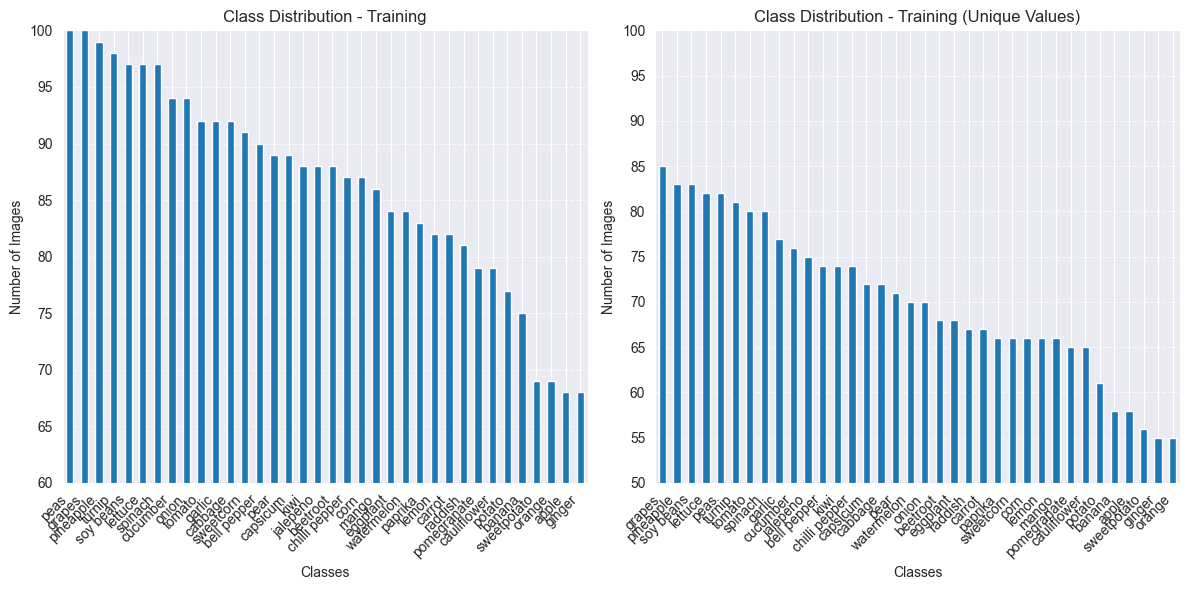

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Chart 1: Class Distribution - Training (Original)
df_treino['category_folder'].value_counts().plot(kind='bar', ax=ax1, title='Class Distribution - Training')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Number of Images')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Adjusting the Y-axis
ax1.set_ylim(60, 100)
ax1.set_yticks(range(60, 101, 5))  # Granularity of 5

# Adding grid lines
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Chart 2: Class Distribution - Training (After Removing Duplicates)
treino_out_v1['category_folder'].value_counts().plot(kind='bar', ax=ax2, title='Class Distribution - Training (Unique Values)')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Number of Images')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjusting the Y-axis
ax2.set_ylim(50, 100)
ax2.set_yticks(range(50, 101, 5))  # Granularity of 5

# Adding grid lines
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **5 - Quantidade de amostras por Dataframes**

In [48]:
# Checking the number of samples per Dataframes
print(colored(f'Number of samples in train : {len(treino_out_v1)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples in validation : {len(validacao_out_v1)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples test : {len(df_teste_no_dupli_v3)}', 'blue', attrs=['bold']))

Number of samples in train : 2534
Number of samples in validation : 360
Number of samples test : 333


### **5.1 - Mostrar uma imagem por Classe (Label)**

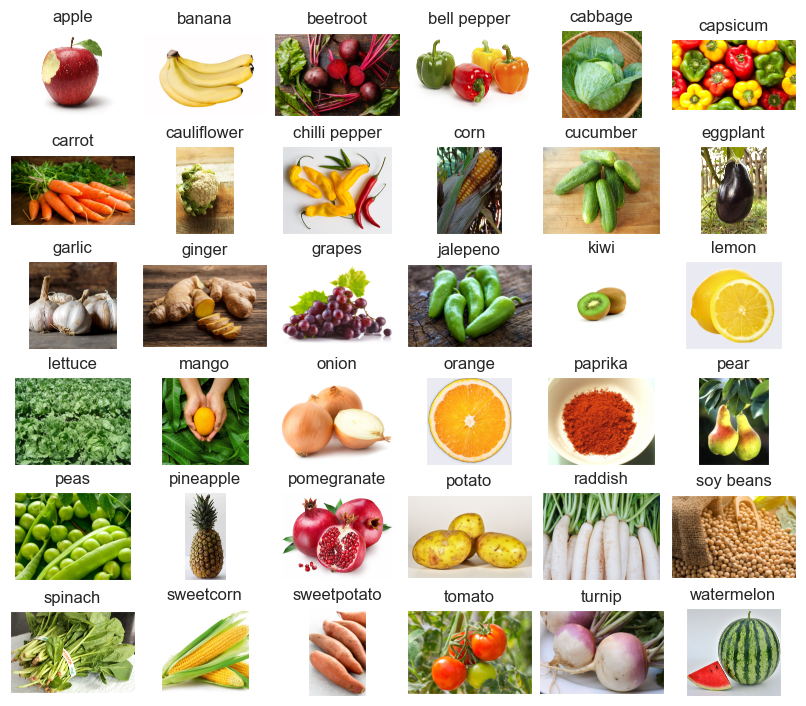

In [49]:
# Create a DataFrame with one Label of each category from train set
df_unique = treino_out_v1.copy().drop_duplicates(subset=["category_folder"]).reset_index()

# Display some pictures of the dataset
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(8, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df_unique.img_dir[i]))
    ax.set_title(df_unique.category_folder[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

### **5.2 - Gerador de dados**

In [50]:
# Train generator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=treino_out_v1,        # Target data
    x_col='img_dir',        # X column
    y_col='category_folder',                  # y column
    target_size=(224, 224),         # Resize images  to
    color_mode='rgb',               # Color mode
    class_mode='categorical',       # type of model
    batch_size=32,
    shuffle=True,
    seed=42,

)


Found 2534 validated image filenames belonging to 36 classes.


In [51]:
# validation generator

validation_datagen = ImageDataGenerator(rescale=1./255,)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validacao_out_v1,
    x_col='img_dir',
    y_col='category_folder',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=False
)


Found 360 validated image filenames belonging to 36 classes.


In [52]:
# Test generator

test_datagen = ImageDataGenerator(rescale=1./255,)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_teste_no_dupli_v3,
    x_col='img_dir',
    y_col='category_folder',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=False
)


Found 333 validated image filenames belonging to 36 classes.


### **6 - MODELAGEM**

### **6.1 - Adicionando Modelo MobileNetV3**

In [53]:
pre_trained_model = MobileNetV3Large(
    input_shape=(224, 224, 3),            # Input image size
    include_top=False,                    # model not include top layer
    weights='imagenet',                   # weights type
    pooling='avg'                         # type of pooling layer
)


### **6.2 - Congelar Camadas MobileNetV3**

In [54]:
# Name of layers in MobileNetV2
for layer in pre_trained_model.layers :
    print(layer.name)

input_layer
rescaling
conv
conv_bn
activation
expanded_conv_depthwise
expanded_conv_depthwise_bn
re_lu
expanded_conv_project
expanded_conv_project_bn
expanded_conv_add
expanded_conv_1_expand
expanded_conv_1_expand_bn
re_lu_1
expanded_conv_1_depthwise_pad
expanded_conv_1_depthwise
expanded_conv_1_depthwise_bn
re_lu_2
expanded_conv_1_project
expanded_conv_1_project_bn
expanded_conv_2_expand
expanded_conv_2_expand_bn
re_lu_3
expanded_conv_2_depthwise
expanded_conv_2_depthwise_bn
re_lu_4
expanded_conv_2_project
expanded_conv_2_project_bn
expanded_conv_2_add
expanded_conv_3_expand
expanded_conv_3_expand_bn
re_lu_5
expanded_conv_3_depthwise_pad
expanded_conv_3_depthwise
expanded_conv_3_depthwise_bn
re_lu_6
expanded_conv_3_squeeze_excite_avg_pool
expanded_conv_3_squeeze_excite_conv
expanded_conv_3_squeeze_excite_relu
expanded_conv_3_squeeze_excite_conv_1
re_lu_7
expanded_conv_3_squeeze_excite_mul
expanded_conv_3_project
expanded_conv_3_project_bn
expanded_conv_4_expand
expanded_conv_4_expand_

In [55]:
# Freeze all layers, except last layer
# The goal is to train just last layer of pre trained model

pre_trained_model.trainable = True
set_trainable = False

for layer in pre_trained_model.layers :
    if layer.name == 'block_16_expand' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

### **6.3 - Definir um Modelo**

In [56]:
# Importing the necessary libraries
from tensorflow import keras
from keras.utils import plot_model
from keras import layers, models

# Add custom layers on top of the base model
model = models.Sequential()
model.add(pre_trained_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(36, activation='softmax'))

# Build the model by specifying the input form
# Assuming your pre_trained_model input shape is (img_height, img_width, 3)
# Replace img_height and img_width with actual values
img_height = 224
img_width = 224
model.build(input_shape=(None, img_height, img_width, 3))

### **6.4 - Diagrama do Modelo**

In [57]:
# view the model
plot_model(model, show_shapes=True, show_layer_names=False, dpi=200)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [58]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 960)            │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       246,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,279,908 (12.51 MB)

 Trainable params: 283,556 (1.08 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

### **6.5 - Modelo de Compilação**

In [59]:
# Compile
model.compile(optimizer=optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### **6.6 - Retornos de Chamada**

In [60]:
# Model CheckPoint
checkpoint_cb = ModelCheckpoint('MyModel.keras', save_best_only=True)

# Early Stoping
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [61]:
# Validar número de batches (steps)
train_steps = len(train_generator)
val_steps = len(validation_generator)

print(f"Steps per epoch (train): {train_steps}")
print(f"Validation steps: {val_steps}")

Steps per epoch (train): 80
Validation steps: 12


In [62]:
# Verifique a saída do gerador
for x, y in train_generator:
    print(f"Batch X shape: {x.shape}, Batch Y shape: {y.shape}")
    break


Batch X shape: (32, 224, 224, 3), Batch Y shape: (32, 36)


### **6.7 - Treinamento do Modelo**

In [63]:

# Treinando o modelo
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator), # Tenta definir como None para conjuntos de validação pequenos
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr]
)

Epoch 1/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.0288 - loss: 3.6169 - val_accuracy: 0.0361 - val_loss: 3.5857 - learning_rate: 0.0010
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.0396 - loss: 3.5800 - val_accuracy: 0.0333 - val_loss: 3.5821 - learning_rate: 0.0010
Epoch 3/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.0374 - loss: 3.5796 - val_accuracy: 0.0278 - val_loss: 3.5844 - learning_rate: 0.0010
Epoch 4/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.0289 - loss: 3.5777 - val_accuracy: 0.0250 - val_loss: 3.5827 - learning_rate: 0.0010
Epoch 5/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - accuracy: 0.0351 - loss: 3.5724 - val_accuracy: 0.0333 - val_loss: 3.5792 - learning_rate: 0.0010
Epoch 6/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 138s 2s/step - accuracy: 0.0344 - loss: 3.5591 - val_accuracy: 0.0361 - val_loss: 3.5737 - learning_rate: 0.0010
Epoch 7/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.0338 - loss: 3.5548 - val_acc

### **6.8 - Plotar Resultados do Treinamento**

In [64]:
# cheque o conteúdo de history.history para ver quais listas possuem tamanhos diferentes
for key, value in history.history.items():
    print(f"{key}: {len(value)}")

accuracy: 30
loss: 30
val_accuracy: 30
val_loss: 30
learning_rate: 30


In [65]:
# Padronizar comprimento das listas (opção 1)
min_length = min(len(history.history[key]) for key in history.history)
for key in history.history:
    history.history[key] = history.history[key][:min_length]

# Agora, criar o DataFrame deve funcionar
result_df = pd.DataFrame(history.history)
print(result_df.tail())

    accuracy      loss  val_accuracy  val_loss  learning_rate
25  0.097869  3.319456      0.055556  3.508354       0.000500
26  0.099053  3.309168      0.075000  3.471495       0.000250
27  0.097080  3.318266      0.080556  3.471063       0.000250
28  0.099842  3.299851      0.086111  3.464012       0.000250
29  0.107735  3.287101      0.077778  3.456246       0.000125


In [66]:
# Convert resutl of training to a DataFrame
result_df = pd.DataFrame(history.history)
result_df.tail()

accuracy      loss  val_accuracy  val_loss  learning_rate
25  0.097869  3.319456      0.055556  3.508354       0.000500
26  0.099053  3.309168      0.075000  3.471495       0.000250
27  0.097080  3.318266      0.080556  3.471063       0.000250
28  0.099842  3.299851      0.086111  3.464012       0.000250
29  0.107735  3.287101      0.077778  3.456246       0.000125

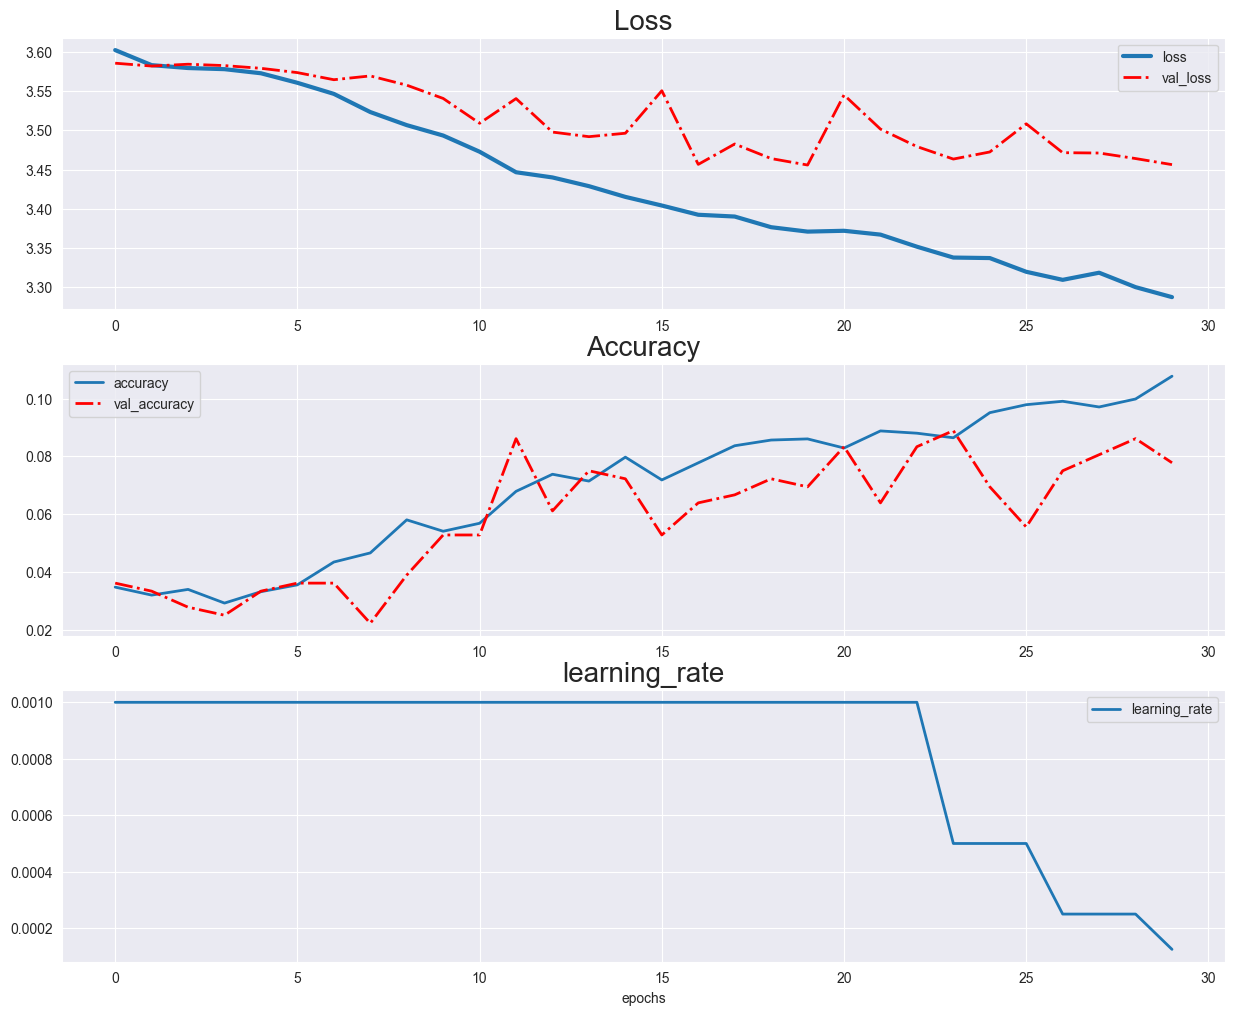

In [68]:
x = np.arange(len(result_df))
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
#  AX0 : Loss
ax[0].plot(x, result_df.loss, label='loss', linewidth=3)
ax[0].plot(x, result_df.val_loss, label='val_loss', linewidth=2, ls='-.', c='r')
ax[0].set_title('Loss', fontsize=20)
ax[0].legend()

#  AX1 : Loss
ax[1].plot(x, result_df.accuracy, label='accuracy', linewidth=2)
ax[1].plot(x, result_df.val_accuracy, label='val_accuracy', linewidth=2, ls='-.', c='r')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].legend()

#  AX2 : Loss
ax[2].plot(x, result_df.learning_rate, label='learning_rate', linewidth=2)
ax[2].set_title('learning_rate', fontsize=20)
ax[2].set_xlabel('epochs')
ax[2].legend()


plt.sharex=True


plt.show()

### **6.9 - Avaliar o Modelo**

In [69]:
# checkpoint callback, save base model weights in "MyModel.keras".
# So, we should load it
best_model = models.load_model('MyModel.keras')

In [73]:
test_loss, test_acc = best_model.evaluate(test_generator)

print(colored(f'Test Loss : {round(test_loss, 3)}', 'green', attrs=['bold']))
print(colored(f'Test Accuracy : {round(test_acc, 3)}', 'green', attrs=['bold']))

11/11 ━━━━━━━━━━━━━━━━━━━━ 19s 2s/step - accuracy: 0.0733 - loss: 3.3413
Test Loss : 3.262
Test Accuracy : 0.087


In [ ]:
def evaluate_model_performance(model, val_generator, class_labels=None):
    """
    Avalia o desempenho do modelo no conjunto de validação e exibe o relatório de classificação.

    Parâmetros:
    - model: Modelo treinado.
    - val_generator: Gerador de dados de validação.
    - class_labels: Lista de nomes das classes. Se None, será extraída do gerador.

    Retorna:
    - report: Relatório de classificação como string.
    """
    # Obter os rótulos verdadeiros do gerador
    true_labels = val_generator.classes

    # Obter nomes das classes, se não fornecidos
    if class_labels is None:
        class_labels = list(val_generator.class_indices.keys())

    # Fazer predições usando o modelo
    predictions = model.predict(val_generator, steps=len(val_generator))

    # Obter a classe prevista (argmax retorna o índice da classe com maior probabilidade)
    predicted_labels = np.argmax(predictions, axis=1)

    # Gerar relatório de classificação
    report = classification_report(true_labels, predicted_labels, target_names=class_labels)
    print(report)
    print('\n')

    # Matriz de confusão
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plotar matriz de confusão com Seaborn
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.xlabel('Rótulos Previstos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.title('Matriz de Confusão')
    plt.show()


12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
               precision    recall  f1-score   support

        apple       0.00      0.00      0.00        10
       banana       0.00      0.00      0.00        10
     beetroot       0.00      0.00      0.00        10
  bell pepper       0.05      0.10      0.07        10
      cabbage       0.00      0.00      0.00        10
     capsicum       0.00      0.00      0.00        10
       carrot       0.00      0.00      0.00        10
  cauliflower       0.00      0.00      0.00        10
chilli pepper       0.00      0.00      0.00        10
         corn       0.00      0.00      0.00        10
     cucumber       0.00      0.00      0.00        10
     eggplant       0.25      0.20      0.22        10
       garlic       0.00      0.00      0.00        10
       ginger       0.00      0.00      0.00        10
       grapes       0.04      0.20      0.06        10
     jalepeno       0.05      0.20      0.08        10
         kiwi       0.00 

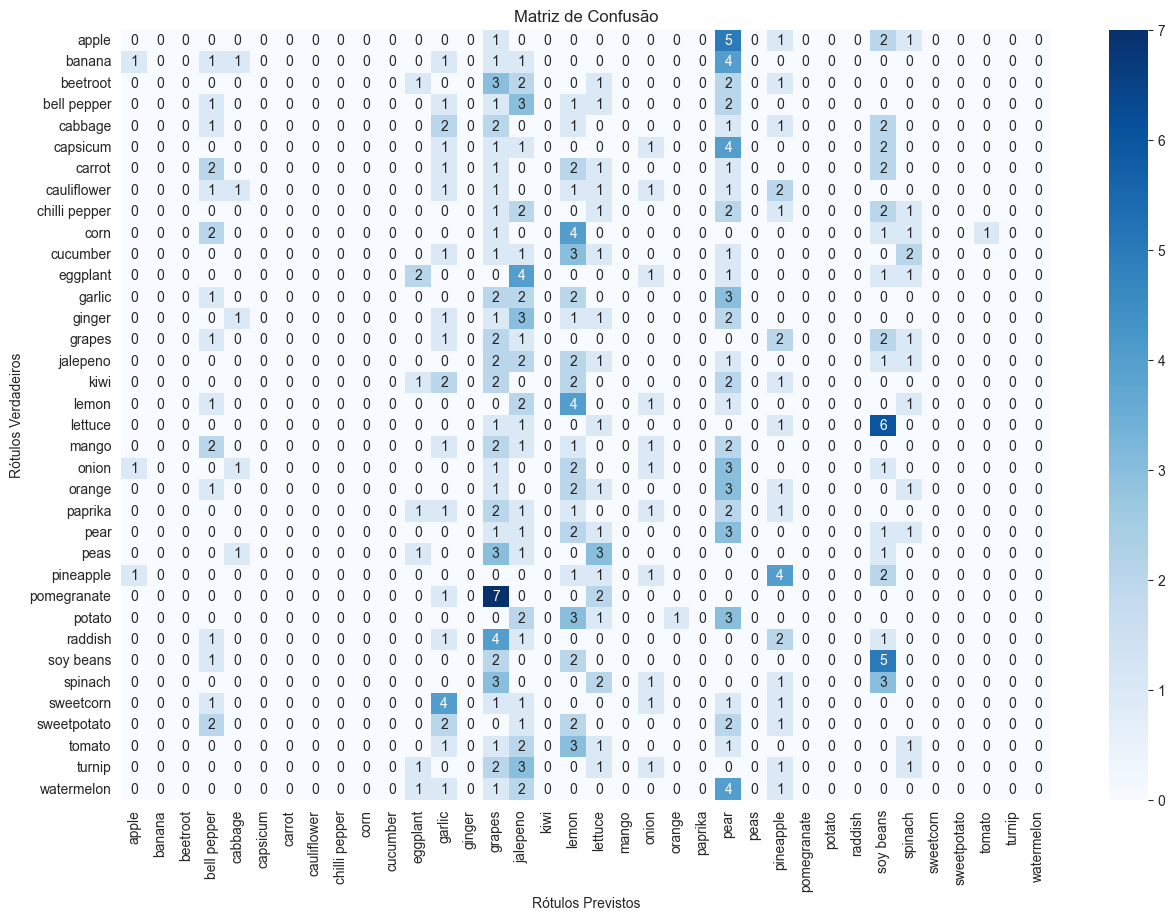

In [86]:
classes = [class_name for class_name in os.listdir(train_dir)]

evaluate_model_performance(best_model, validation_generator, classes)

## **ETAPA 3.2 - MODELO VERSÃO 2**


In [89]:
# Create training, test, and validation DataFrames from the original DataFrame.
df_treino = df[df['folder_name'] == 'train'].copy()
df_teste = df[df['folder_name'] == 'test'].copy()
df_val = df[df['folder_name'] == 'validation'].copy()

### **1 - Eliminação e Verificação de Duplicatas no Conjunto de Treino**

In [90]:
N_duplicatas_tr=df_treino['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de treino: {N_duplicatas_tr}')

Número de imagens duplicadas no conjunto de treino: 221


In [91]:
# Create a new DataFrame to store unique hashes per class
dfs = []

# Iterate through each class in the DataFrame
for classe, grupo in df_treino.groupby('category_folder'):  
    # Select the unique hashes within the class
    hashes_unicos = grupo['img_hash'].unique()  
    # Filter the original group to keep only the first occurrences of the unique hashes
    grupo_filtrado = grupo[grupo['img_hash'].isin(hashes_unicos)].drop_duplicates(subset='img_hash')  
    dfs.append(grupo_filtrado)  # Append the filtered group to the list of DataFrames

# Concatenate the results into a single DataFrame
df_no_dupli = pd.concat(dfs, ignore_index=True)  # Concatenate all filtered DataFrames, resetting the index

In [92]:
# Calculate and print the number of duplicated image hashes in the training set.
N_duplicatas_tr_NO=df_no_dupli['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de treino: {N_duplicatas_tr_NO}')

Número de imagens duplicadas no conjunto de treino: 19


### **1.1 - Verificação das duplicatas entre classes (treino)**

In [94]:
# Create a copy and convert image hash to string for grouping.
df_no_dupli_v2 = df_no_dupli.copy()
df_no_dupli_v2['image_hash_str'] = df_no_dupli_v2['img_hash'].astype(str)

# Identify hashes present in multiple categories.
multi_class_hashes_v2 = df_no_dupli_v2.groupby('image_hash_str')['category_folder'].nunique().reset_index(name='num_classes')
multi_class_hashes_v2 = multi_class_hashes_v2[multi_class_hashes_v2['num_classes'] > 1]['image_hash_str']

# Mark images present in multiple categories and remove temporary column.
df_no_dupli_v2['imagem em 2 classes'] = df_no_dupli_v2['image_hash_str'].isin(multi_class_hashes_v2).map({True: 's', False: 'n'})  # Using isin and map for conciseness
df_no_dupli_v2.drop(columns='image_hash_str', inplace=True)

# Summarize and display the duplicate information.
duplicate_summary = df_no_dupli_v2[df_no_dupli_v2['imagem em 2 classes'] == 's'].groupby('category_folder')['imagem em 2 classes'].count().reset_index()
unique_counts = df_no_dupli.groupby('category_folder')['img_hash'].nunique().reset_index(name='Imagens unicas na classe')
final_summary = unique_counts.merge(duplicate_summary, on='category_folder', how='left').sort_values(by='imagem em 2 classes', ascending=False).dropna(subset=['imagem em 2 classes'])

# Display the final summary table
display(final_summary)

category_folder  Imagens unicas na classe  imagem em 2 classes
9             corn                        81                 11.0
31       sweetcorn                        82                 11.0
3      bell pepper                        84                  5.0
5         capsicum                        86                  4.0
8    chilli pepper                        86                  2.0
15        jalepeno                        85                  2.0
22         paprika                        76                  1.0
27          potato                        72                  1.0
32     sweetpotato                        66                  1.0

In [95]:
from itertools import combinations

# This code block identifies and analyzes duplicate images across different classes.
df_no_dupli_v2 = df_no_dupli.copy()
df_no_dupli_v2['image_hash_str'] = df_no_dupli_v2['img_hash'].astype(str)
hash_to_classes = df_no_dupli_v2.groupby('image_hash_str')['category_folder'].apply(list).reset_index(name='category_folder')
multi_class_hashes = hash_to_classes[hash_to_classes['category_folder'].apply(len) > 1]
duplicated_pairs = []

# Iterate over each hash with duplicates
for _, row in multi_class_hashes.iterrows():
    image_hash = row['image_hash_str']
    classes = row['category_folder']

    # Create unique pairs of classes
    class_pairs = list(combinations(classes, 2))

    # For each pair, find the indices in the original DataFrame
    for class_a, class_b in class_pairs:
        indices_a = df_no_dupli_v2[(df_no_dupli_v2['category_folder'] == class_a) &
                                   (df_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        indices_b = df_no_dupli_v2[(df_no_dupli_v2['category_folder'] == class_b) &
                                   (df_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()

        # Add all pairs of indices
        for idx_a in indices_a:
            for idx_b in indices_b:
                duplicated_pairs.append((img_hash, class_a, class_b, idx_a, idx_b))

# Convert the pairs into a DataFrame
df_pairs = pd.DataFrame(duplicated_pairs, columns=['img_hash', 'class_a', 'class_b', 'index_a', 'index_b'])
df_pairs

img_hash        class_a      class_b  index_a  index_b
0   afb9f03d8450a3d1           corn    sweetcorn      748     2579
1   afb9f03d8450a3d1           corn    sweetcorn      705     2584
2   afb9f03d8450a3d1           corn    sweetcorn      716     2519
3   afb9f03d8450a3d1           corn    sweetcorn      718     2530
4   afb9f03d8450a3d1         potato  sweetpotato     2230     2587
5   afb9f03d8450a3d1  chilli pepper     jalepeno      648     1252
6   afb9f03d8450a3d1    bell pepper      paprika      254     1825
7   afb9f03d8450a3d1  chilli pepper     jalepeno      642     1206
8   afb9f03d8450a3d1           corn    sweetcorn      768     2516
9   afb9f03d8450a3d1    bell pepper     capsicum      250      421
10  afb9f03d8450a3d1           corn    sweetcorn      717     2554
11  afb9f03d8450a3d1           corn    sweetcorn      781     2544
12  afb9f03d8450a3d1    bell pepper     capsicum      292      451
13  afb9f03d8450a3d1           corn    sweetcorn      709     2535
14  afb9f03d8450a3d1    bell pepper     capsicum      275      440
15  afb9f03d8450a3d1           corn    sweetcorn      715     2518
16  afb9f03d8450a3d1           corn    sweetcorn      727     2567
17  afb9f03d8450a3d1           corn    sweetcorn      772     2540
18  afb9f03d8450a3d1    bell pepper     capsicum      236      414

### **1.2 - Exclusão das duplicatas entre classes (treino)**

In [96]:
# Create a list to store all indices to drop
all_indices_to_drop = []

# Function to get indices and remove corresponding rows from df_pairs
def get_indices_and_remove_rows(df_pairs, condition_col, condition_val, index_col, num_rows):
    indices = df_pairs[df_pairs[condition_col] == condition_val][index_col].head(num_rows).tolist()
    df_pairs.drop(index=df_pairs[df_pairs[index_col].isin(indices)].index, inplace=True)  # Remove rows from df_pairs
    return indices

# Get indices and remove rows for each condition
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'corn', 'index_a', 5))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'sweetcorn', 'index_b', 6))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'capsicum', 'index_b', 4))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'chilli pepper', 'index_a', 2))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'potato', 'index_a', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'bell pepper', 'index_a', 1))

# Drop all indices at once from df_no_dupli_v2
df_no_dupli_v3 = df_no_dupli_v2.drop(index=all_indices_to_drop).copy()


### **1.3 - Confirmação da exclusão das duplicatas em classes diferentes (treino)**

In [97]:
# Calculate and print the number of duplicate images in the training set, before and after treatment.
N_duplicatas_tr=df_treino['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de treino original: {N_duplicatas_tr}')
N_duplicatas_tr=df_no_dupli_v3['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de treino após tratamento: {N_duplicatas_tr}')


Número de imagens duplicadas no conjunto de treino original: 221
Número de imagens duplicadas no conjunto de treino após tratamento: 0


### **1.4 - Comparativo do balanceamento antes e depois da exclusão de duplicatas da pasta treino**

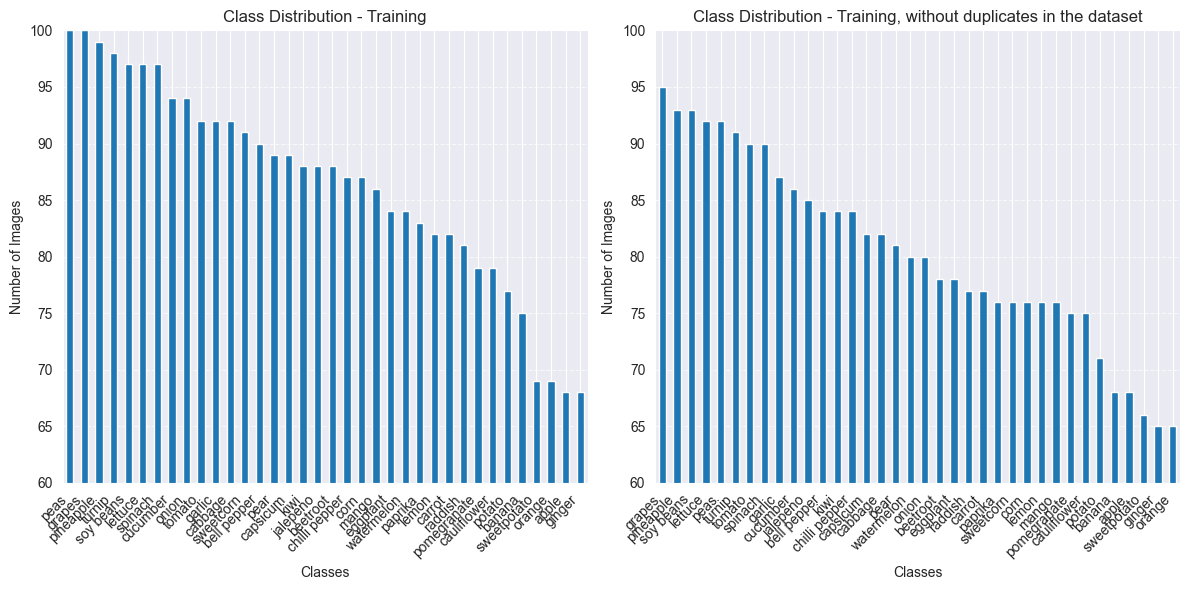

In [98]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Chart 1: Class Distribution - Training
df_treino['category_folder'].value_counts().plot(kind='bar', ax=ax1, title='Class Distribution - Training')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Number of Images')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Adjusting the Y-axis
ax1.set_ylim(60, 100)
ax1.set_yticks(range(60, 101, 5))  # Granularity of 10

# Adding grid lines
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Chart 2: Class Distribution - Training, without duplicates
df_no_dupli_v3['category_folder'].value_counts().plot(kind='bar', ax=ax2, title='Class Distribution - Training, without duplicates in the dataset')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Number of Images')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjusting the Y-axis
ax2.set_ylim(60, 100)
ax2.set_yticks(range(60, 101, 5))  # Granularity of 10

# Adding grid lines
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **2 - Eliminação e Verificação de Duplicatas no Conjunto de Validação**

In [99]:
N_duplicatas_tr=df_val['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de validação: {N_duplicatas_tr}')

Número de imagens duplicadas no conjunto de validação: 26


In [100]:
# Create a new DataFrame to store unique hashes per class
dfs = []

# Iterate through each class in the DataFrame
for classe, grupo in df_val.groupby('category_folder'):  
    # Select the unique hashes within the class
    hashes_unicos = grupo['img_hash'].unique()  
    # Filter the original group to keep only the first occurrences of the unique hashes
    grupo_filtrado = grupo[grupo['img_hash'].isin(hashes_unicos)].drop_duplicates(subset='img_hash')  
    dfs.append(grupo_filtrado)  # Append the filtered group to the list of DataFrames

# Concatenate the results into a single DataFrame
df_val_no_dupli = pd.concat(dfs, ignore_index=True)  # Concatenate all filtered DataFrames, resetting the index


In [101]:
# Calculate and print the number of duplicated image hashes in the training set.
N_duplicatas_tr_NO=df_val_no_dupli['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de validação após tratamento: {N_duplicatas_tr_NO}')

Número de imagens duplicadas no conjunto de validação após tratamento: 3


### **2.1 - Verificação das duplicatas entre classes (Validação)**

In [102]:
# Create a copy and convert image hash to string for grouping.
df_val_no_dupli_v2 = df_val_no_dupli.copy()
df_val_no_dupli_v2['image_hash_str'] = df_val_no_dupli_v2['img_hash'].astype(str)

# Identify hashes present in multiple categories.
multi_class_hashes_v2 = df_val_no_dupli_v2.groupby('image_hash_str')['category_folder'].nunique().reset_index(name='num_classes')
multi_class_hashes_v2 = multi_class_hashes_v2[multi_class_hashes_v2['num_classes'] > 1]['image_hash_str']

# Mark images present in multiple categories and remove temporary column.
df_val_no_dupli_v2['imagem em 2 classes'] = df_val_no_dupli_v2['image_hash_str'].isin(multi_class_hashes_v2).map({True: 's', False: 'n'})
df_val_no_dupli_v2.drop(columns='image_hash_str', inplace=True)

# Summarize and display the duplicate information.
duplicate_summary = df_val_no_dupli_v2[df_val_no_dupli_v2['imagem em 2 classes'] == 's'].groupby('category_folder')['imagem em 2 classes'].count().reset_index()
unique_counts = df_val_no_dupli_v2.groupby('category_folder')['img_hash'].nunique().reset_index(name='Imagens unicas na classe')
final_summary = unique_counts.merge(duplicate_summary, on='category_folder', how='left').sort_values(by='imagem em 2 classes', ascending=False).dropna(subset=['imagem em 2 classes'])

# Display the final summary table
display(final_summary)


category_folder  Imagens unicas na classe  imagem em 2 classes
31       sweetcorn                        10                  2.0
9             corn                        10                  2.0
5         capsicum                         9                  1.0
3      bell pepper                         7                  1.0

In [103]:
# Create a copy and convert image hashes to strings
df_val_no_dupli_v2 = df_val_no_dupli.copy()
df_val_no_dupli_v2['image_hash_str'] = df_val_no_dupli_v2['img_hash'].astype(str)

# Group hashes by category and find those in multiple categories
hash_to_classes = df_val_no_dupli_v2.groupby('image_hash_str')['category_folder'].apply(list).reset_index(name='category_folder')
multi_class_hashes = hash_to_classes[hash_to_classes['category_folder'].apply(len) > 1]

# Store duplicate image pairs
duplicated_pairs = []

# Iterate through multi-class hashes to find all duplicate pairs
for _, row in multi_class_hashes.iterrows():
    image_hash = row['image_hash_str']
    classes = row['category_folder']
    
    # Create unique class pairs
    for class_a, class_b in combinations(classes, 2):  
        # Find indices of duplicates in original DataFrame
        indices_a = df_val_no_dupli_v2[(df_val_no_dupli_v2['category_folder'] == class_a) & (df_val_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        indices_b = df_val_no_dupli_v2[(df_val_no_dupli_v2['category_folder'] == class_b) & (df_val_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        
        # Append all duplicate pairs to the list
        duplicated_pairs.extend([(image_hash, class_a, class_b, idx_a, idx_b) for idx_a in indices_a for idx_b in indices_b])  

# Create a DataFrame from the duplicate pairs
df_pairs = pd.DataFrame(duplicated_pairs, columns=['img_hash', 'class_a', 'class_b', 'index_a', 'index_b']) 
df_pairs

img_hash      class_a    class_b  index_a  index_b
0  87eda15658abc417         corn  sweetcorn       78      292
1  c5a63ef44460f38e  bell pepper   capsicum       32       48
2  d1f1e3870c8f1ec8         corn  sweetcorn       81      288

### **2.2 - Exclusão das duplicatas entre classes (Validação)**

In [104]:
# Create a list to store all indices to drop
all_indices_to_drop = []

# Function to get indices and remove corresponding rows from df_pairs
def get_indices_and_remove_rows(df_pairs, condition_col, condition_val, index_col, num_rows):
    indices = df_pairs[df_pairs[condition_col] == condition_val][index_col].head(num_rows).tolist()
    df_pairs.drop(index=df_pairs[df_pairs[index_col].isin(indices)].index, inplace=True)  # Remove rows from df_pairs
    return indices

# Get indices and remove rows for each condition
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'corn', 'index_a', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'sweetcorn', 'index_b', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'capsicum', 'index_b', 1))

# Drop all indices at once from df_val_no_dupli_v3
df_val_no_dupli_v3 = df_val_no_dupli_v2.drop(index=all_indices_to_drop).copy()


### **2.3 - Confirmação da exclusão das duplicatas em classes diferentes (Validação)**

In [105]:
# Calculate and print the number of duplicate images in the training set, before and after treatment.
N_duplicatas_tr=df_val['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de validação original: {N_duplicatas_tr}')
N_duplicatas_tr=df_val_no_dupli_v3['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de validação após tratamento: {N_duplicatas_tr}')


Número de imagens duplicadas no conjunto de validação original: 26
Número de imagens duplicadas no conjunto de validação após tratamento: 0


### **3 - Eliminação e Verificação de Duplicatas no Conjunto de Teste**

In [106]:
N_duplicatas_tr=df_teste['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de teste: {N_duplicatas_tr}')

Número de imagens duplicadas no conjunto de teste: 26


In [107]:
# Create a new DataFrame to store unique hashes per class
dfs = []

# Iterate through each class in the DataFrame
for classe, grupo in df_teste.groupby('category_folder'):
    # Select the unique hashes within the class
    hashes_unicos = grupo['img_hash'].unique()
    # Filter the original group to keep only the first occurrences of the unique hashes
    grupo_filtrado = grupo[grupo['img_hash'].isin(hashes_unicos)].drop_duplicates(subset='img_hash')
    dfs.append(grupo_filtrado)

# Concatenate the results into a single DataFrame
df_no_dupli = pd.concat(dfs, ignore_index=True)


In [108]:
# Calculate and print the number of duplicated image hashes in the training set.
N_duplicatas_tval_NO=df_no_dupli['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de teste: {N_duplicatas_tval_NO}')

Número de imagens duplicadas no conjunto de teste: 3


### **3.1 - Verificação das duplicatas entre classes (Teste)**

In [109]:
# Create a copy and convert image hash to string for grouping.
df_test_no_dup = df_no_dupli.copy()
df_test_no_dup['hash_str'] = df_test_no_dup['img_hash'].astype(str)

# Identify hashes present in multiple categories.
multi_class_hashes = df_test_no_dup.groupby('hash_str')['category_folder'].nunique().reset_index(name='num_classes')
multi_class_hashes = multi_class_hashes[multi_class_hashes['num_classes'] > 1]['hash_str']

# Mark images present in multiple categories and remove temporary column.
df_test_no_dup['in_2_classes'] = df_test_no_dup['hash_str'].isin(multi_class_hashes).map({True: 's', False: 'n'})
df_test_no_dup.drop(columns='hash_str', inplace=True)

# Summarize and display the duplicate information.
dup_counts = df_test_no_dup[df_test_no_dup['in_2_classes'] == 's'].groupby('category_folder')['in_2_classes'].count().reset_index()
unique_counts = df_no_dupli.groupby('category_folder')['img_hash'].nunique().reset_index(name='unique_images')
final_result = unique_counts.merge(dup_counts, on='category_folder', how='left').sort_values(by='in_2_classes', ascending=False).dropna(subset=['in_2_classes'])

# Display the final summary table
display(final_result)


category_folder  unique_images  in_2_classes
31       sweetcorn             10           2.0
9             corn             10           2.0
5         capsicum              9           1.0
3      bell pepper              8           1.0

In [110]:
# Create a copy and convert image hashes to strings
df_teste_no_dupli_v2 = df_no_dupli.copy()
df_teste_no_dupli_v2['image_hash_str'] = df_teste_no_dupli_v2['img_hash'].astype(str)

# Group hashes by category and identify those present in multiple categories
hash_to_classes = df_teste_no_dupli_v2.groupby('image_hash_str')['category_folder'].apply(list).reset_index(name='category_folder')
multi_class_hashes = hash_to_classes[hash_to_classes['category_folder'].apply(len) > 1]

# Store duplicate image pairs
duplicated_pairs = []

# Iterate through multi-class hashes to find all duplicate pairs
for _, row in multi_class_hashes.iterrows():
    image_hash = row['image_hash_str']
    classes = row['category_folder']
    
    # Create unique class pairs
    for class_a, class_b in combinations(classes, 2):  
        # Find indices of duplicates in the original DataFrame
        indices_a = df_teste_no_dupli_v2[(df_teste_no_dupli_v2['category_folder'] == class_a) & 
                                         (df_teste_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        indices_b = df_teste_no_dupli_v2[(df_teste_no_dupli_v2['category_folder'] == class_b) & 
                                         (df_teste_no_dupli_v2['image_hash_str'] == image_hash)].index.tolist()
        
        # Append all duplicate pairs to the list
        duplicated_pairs.extend([(image_hash, class_a, class_b, idx_a, idx_b) for idx_a in indices_a for idx_b in indices_b])

# Create a DataFrame from the duplicate pairs
df_pairs = pd.DataFrame(duplicated_pairs, columns=['img_hash', 'class_a', 'class_b', 'index_a', 'index_b'])
df_pairs


img_hash      class_a    class_b  index_a  index_b
0  87eda15658abc417         corn  sweetcorn       81      300
1  c5a63ef44460f38e  bell pepper   capsicum       33       49
2  d1f1e3870c8f1ec8         corn  sweetcorn       84      296

### **3.2 - Exclusão das duplicatas entre classes (Teste)**

In [111]:
# Create a list to store all indices to drop
all_indices_to_drop = []

# Function to get indices and remove corresponding rows from df_pairs
def get_indices_and_remove_rows(df_pairs, condition_col, condition_val, index_col, num_rows):
    indices = df_pairs[df_pairs[condition_col] == condition_val][index_col].head(num_rows).tolist()
    df_pairs.drop(index=df_pairs[df_pairs[index_col].isin(indices)].index, inplace=True)  # Remove rows from df_pairs
    return indices

# Get indices and remove rows for each condition
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_a', 'corn', 'index_a', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'sweetcorn', 'index_b', 1))
all_indices_to_drop.extend(get_indices_and_remove_rows(df_pairs, 'class_b', 'capsicum', 'index_b', 1))

# Drop all indices at once from df_teste_no_dupli_v3
df_teste_no_dupli_v3 = df_teste_no_dupli_v2.drop(index=all_indices_to_drop).copy()

### **3.3 - Confirmação da exclusão das duplicatas em classes diferentes (Teste)**

In [112]:
# Calculate and print the number of duplicate images in the training set, before and after treatment.
N_duplicatas_tval_NO=df_no_dupli['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de teste: {N_duplicatas_tval_NO}')
N_duplicatas_tval_NO=df_teste_no_dupli_v3['img_hash'].duplicated().sum()
print(f'Número de imagens duplicadas no conjunto de teste após o tratamento: {N_duplicatas_tval_NO}')

Número de imagens duplicadas no conjunto de teste: 3
Número de imagens duplicadas no conjunto de teste após o tratamento: 0


### **4 - Comparação conjunto de teste x todos**

In [113]:
# Create a copy of the training data for further processing
treino_out = df_no_dupli_v3.copy()  

# Create a copy of the validation data for further processing
validacao_out = df_val_no_dupli_v3.copy() 

# Extract the image hashes from the test data and store them in a variable
hashs_teste = df_teste_no_dupli_v3['img_hash']

### **4.1 - Imagens do set de validação que não estão presentes no set de teste**

In [114]:
# Select validation images that are not present in the test set
# by comparing their image hashes 
val_sem_hash_teste = validacao_out[~validacao_out['img_hash'].isin(hashs_teste)]  

# Check if the resulting DataFrame is empty
if val_sem_hash_teste.empty:
    print("All Images contained in the Validation set are the same as the Test set") 
else:
    # Display the resulting DataFrame containing the unique validation images
    display(val_sem_hash_teste)

All Images contained in the Validation set are the same as the Test set


### **4.2 - Imagens do set de treino que não estão presentes no set de teste**

In [115]:
# Select training images that are not present in the test set
# by comparing their image hashes
treino_out_v1 = treino_out[~treino_out['img_hash'].isin(hashs_teste)]  

# Display the resulting DataFrame containing the unique training images
treino_out_v1

img_dir  img_corrupted  \
1     ./fruit-and-vegetable-image-recognition\train\...          False   
2     ./fruit-and-vegetable-image-recognition\train\...          False   
3     ./fruit-and-vegetable-image-recognition\train\...          False   
4     ./fruit-and-vegetable-image-recognition\train\...          False   
5     ./fruit-and-vegetable-image-recognition\train\...          False   
...                                                 ...            ...   
2908  ./fruit-and-vegetable-image-recognition\train\...          False   
2909  ./fruit-and-vegetable-image-recognition\train\...          False   
2910  ./fruit-and-vegetable-image-recognition\train\...          False   
2911  ./fruit-and-vegetable-image-recognition\train\...          False   
2912  ./fruit-and-vegetable-image-recognition\train\...          False   

              img_hash image_format   width  height  channels folder_name  \
1     e99c96789d653826          jpg  1200.0  1200.0       3.0       train   
2     ed9b904ccf311c65          jpg   249.0   250.0       3.0       train   
3     aaeaccc3d8dd5203          jpg   800.0  1200.0       3.0       train   
4     b49c939c1e6ccccc          jpg   720.0  1280.0       3.0       train   
5     b04fb16c4b64c9f2          jpg  1840.0  1200.0       3.0       train   
...                ...          ...     ...     ...       ...         ...   
2908  83e1ccd4970f3e1c          jpg  1884.0  2223.0       3.0       train   
2909  cec9a47cc62dc075          jpg   683.0  1024.0       3.0       train   
2910  f08b2cf0a79e8b19          jpg   400.0   800.0       3.0       train   
2911  940b7d09eea69e16          jpg   600.0   900.0       3.0       train   
2912  818fe4f2f731a682          jpg  2165.0  1438.0       3.0       train   

     category_folder    image_hash_str  
1              apple  e99c96789d653826  
2              apple  ed9b904ccf311c65  
3              apple  aaeaccc3d8dd5203  
4              apple  b49c939c1e6ccccc  
5              apple  b04fb16c4b64c9f2  
...              ...               ...  
2908      watermelon  83e1ccd4970f3e1c  
2909      watermelon  cec9a47cc62dc075  
2910      watermelon  f08b2cf0a79e8b19  
2911      watermelon  940b7d09eea69e16  
2912      watermelon  818fe4f2f731a682  

[2572 rows x 10 columns]

### **4.3 - Criando um novo DataFrame de validação apartir do DataFrame de Treino**

In [116]:
# Set the random state for reproducibility
m = 10  

# Define a function to sample data from a DataFrame
def amostragem(df, n=10, random_state=42): 
    # Group by category and sample a specified number of items from each group
    sampled_df = df.groupby('category_folder').apply(
        lambda x: x.sample(n=min(n, len(x)), random_state=random_state)  
    ).reset_index(drop=True) # Reset the index

    return sampled_df

# Sample 10 images per category from the training data to create a validation set
validacao_out_v1 = amostragem(treino_out_v1, n=10, random_state=m)

### **4.4 - Confirmando e eliminando duplicatas entre o novo DataFrame de validação e o novo DataFrame de Treino**

In [117]:
# Extract image hashes from the validation set
hashs_validacao = validacao_out_v1['img_hash']  

# Remove training images that are also present in the validation set
# by comparing their image hashes to ensure no overlap
treino_out_v1 = treino_out[~treino_out['img_hash'].isin(hashs_validacao)]

In [118]:
# Find common image hashes between the validation and training sets
common_hashes = validacao_out_v1[validacao_out_v1['img_hash'].isin(treino_out_v1['img_hash'])] 

# Check if there are any common hashes
if len(common_hashes) > 0:  
    print("There are common 'img_hash' values between validacao_out_v1 and treino_out_v1.")
    print(f"Number of common hashes: {len(common_hashes)}")
    # You can further examine the 'common_hashes' DataFrame if needed.
else:
    print("There are no common 'img_hash' values between validacao_out_v1 and treino_out_v1.")

There are no common 'img_hash' values between validacao_out_v1 and treino_out_v1.


### **4.5 - Plotando os Gráficos de Distribuição antes e depois da readequação**

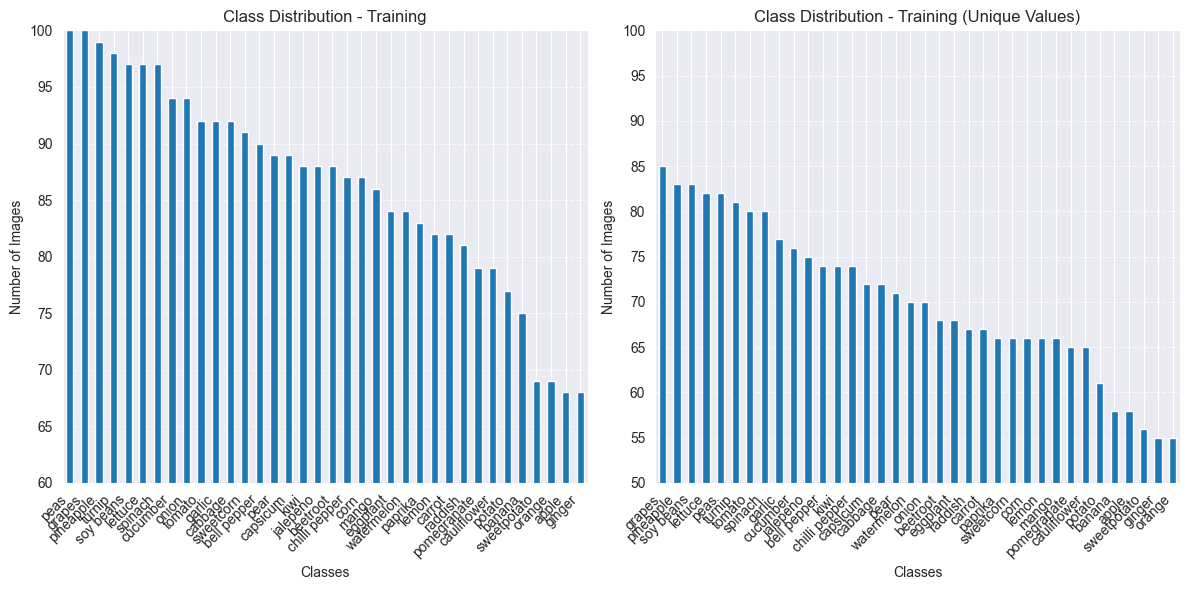

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Chart 1: Class Distribution - Training (Original)
df_treino['category_folder'].value_counts().plot(kind='bar', ax=ax1, title='Class Distribution - Training')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Number of Images')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Adjusting the Y-axis
ax1.set_ylim(60, 100)
ax1.set_yticks(range(60, 101, 5))  # Granularity of 5

# Adding grid lines
ax1.grid(True, axis='y', linestyle='--', alpha=0.7)

# Chart 2: Class Distribution - Training (After Removing Duplicates)
treino_out_v1['category_folder'].value_counts().plot(kind='bar', ax=ax2, title='Class Distribution - Training (Unique Values)')
ax2.set_xlabel('Classes')
ax2.set_ylabel('Number of Images')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

# Adjusting the Y-axis
ax2.set_ylim(50, 100)
ax2.set_yticks(range(50, 101, 5))  # Granularity of 5

# Adding grid lines
ax2.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### **5 - Transformar os Conjuntos de Dados Para 10 Labels**

Devido ao baixo desempenho observado na primeira versão do modelo, optamos por utilizar apenas 10 classes na segunda versão. Assim, avaliaremos a capacidade de generalização do modelo proposto.

Como os conjuntos de validação e teste são bem balanceados, selecionamos as 10 classes de forma a garantir que o conjunto de treinamento não apresente desbalanceamento.

In [174]:
category_counts = treino_out_v1['category_folder'].value_counts()

# Filter for categories with counts between 70 and 65
filtered_categories = category_counts[(category_counts >= 65) & (category_counts <= 70)]

# Sort in descending order and get the top 10 categories
categories = filtered_categories.sort_values(ascending=False).head(10).index.tolist()

# Filter treino_out_v1
treino_out_v1 = treino_out_v1[treino_out_v1['category_folder'].isin(categories)]

# Filter validacao_out_v1
validacao_out_v1 = validacao_out_v1[validacao_out_v1['category_folder'].isin(categories)]

# Filter df_teste_no_dupli_v3
df_teste_no_dupli_v3 = df_teste_no_dupli_v3[df_teste_no_dupli_v3['category_folder'].isin(categories)]

In [175]:
print("Categories of the new training set")
print(treino_out_v1['category_folder'].value_counts())
print('\n')
print("Categories of the new validation set")
print(validacao_out_v1['category_folder'].value_counts())
print('\n')
print("Categories of the new test set")
print(df_teste_no_dupli_v3['category_folder'].value_counts())

Categories of the new training set
category_folder
watermelon    70
onion         70
eggplant      68
beetroot      68
carrot        67
raddish       67
lemon         66
corn          66
paprika       66
sweetcorn     66
Name: count, dtype: int64


Categories of the new validation set
category_folder
beetroot      10
carrot        10
corn          10
eggplant      10
lemon         10
onion         10
paprika       10
raddish       10
sweetcorn     10
watermelon    10
Name: count, dtype: int64


Categories of the new test set
category_folder
beetroot      10
eggplant      10
watermelon    10
lemon         10
carrot         9
corn           9
onion          9
paprika        9
raddish        9
sweetcorn      9
Name: count, dtype: int64


### **5.1 - Quantidade de Amostras por Dataframes**

In [176]:
# Checking the number of samples per Dataframes
print(colored(f'Number of samples in train : {len(treino_out_v1)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples in validation : {len(validacao_out_v1)}', 'blue', attrs=['bold']))
print(colored(f'Number of samples test : {len(df_teste_no_dupli_v3)}', 'blue', attrs=['bold']))

Number of samples in train : 674
Number of samples in validation : 100
Number of samples test : 94


### **5.2 - Mostrar uma Imagem por Classe (Label)**

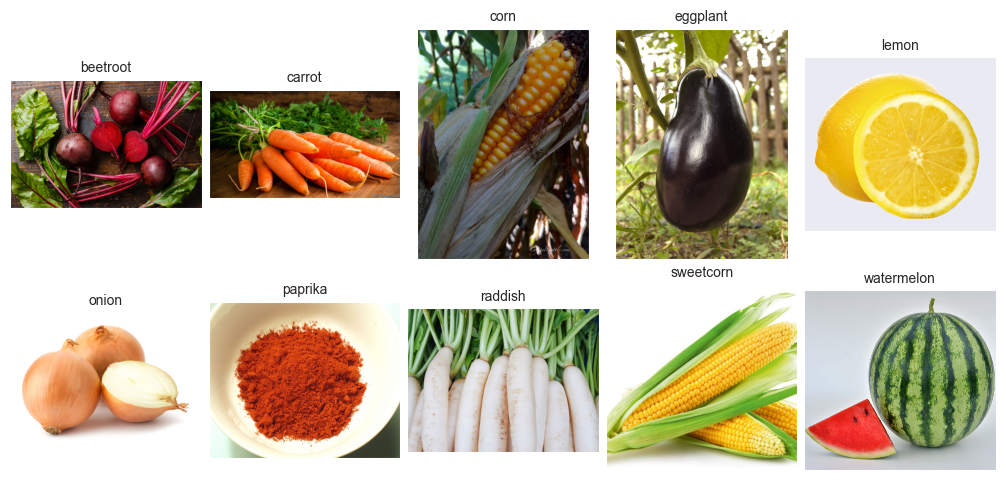

In [177]:
# Create a DataFrame with one Label of each category from train set
df_unique = treino_out_v1.copy().drop_duplicates(subset=["category_folder"]).reset_index()

# Display 10 pictures of the dataset
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5),  # Adjust layout for 10 images (2 rows x 5 columns)
                        subplot_kw={'xticks': [], 'yticks': []})

# Limit the loop to 10 images
for i, ax in enumerate(axes.flat[:10]):
    ax.imshow(plt.imread(df_unique.img_dir[i]))
    ax.set_title(df_unique.category_folder[i], fontsize=10)

plt.tight_layout(pad=0.5)
plt.show()


### **5.3 - Gerador de Dados**

In [178]:
# Train generator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=treino_out_v1,        # Target data
    x_col='img_dir',        # X column
    y_col='category_folder',                  # y column
    target_size=(224, 224),         # Resize images  to
    color_mode='rgb',               # Color mode
    class_mode='categorical',       # type of model
    batch_size=32,
    shuffle=True,
    seed=42,

)


Found 674 validated image filenames belonging to 10 classes.


In [179]:
# validation generator

validation_datagen = ImageDataGenerator(rescale=1./255,)

validation_generator = validation_datagen.flow_from_dataframe(
    dataframe=validacao_out_v1,
    x_col='img_dir',
    y_col='category_folder',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=False
)


Found 100 validated image filenames belonging to 10 classes.


In [180]:
# Test generator

test_datagen = ImageDataGenerator(rescale=1./255,)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_teste_no_dupli_v3,
    x_col='img_dir',
    y_col='category_folder',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    seed=42,
    shuffle=False
)


Found 94 validated image filenames belonging to 10 classes.


### **6 - MODELAGEM**

### **6.1 - Adicionando Modelo MobileNetV3**

In [181]:
pre_trained_model_v2 = MobileNetV3Large(
    input_shape=(224, 224, 3),            # Input image size
    include_top=False,                    # model not include top layer
    weights='imagenet',                   # weights type
    pooling='avg'                         # type of pooling layer
)


### **6.2 - Congelar Camadas MobileNetV3**

In [182]:
# Name of layers in MobileNetV3
for layer in pre_trained_model_v2.layers :
    print(layer.name)

input_layer_8
rescaling_5
conv
conv_bn
activation_100
expanded_conv_depthwise
expanded_conv_depthwise_bn
re_lu_95
expanded_conv_project
expanded_conv_project_bn
expanded_conv_add
expanded_conv_1_expand
expanded_conv_1_expand_bn
re_lu_96
expanded_conv_1_depthwise_pad
expanded_conv_1_depthwise
expanded_conv_1_depthwise_bn
re_lu_97
expanded_conv_1_project
expanded_conv_1_project_bn
expanded_conv_2_expand
expanded_conv_2_expand_bn
re_lu_98
expanded_conv_2_depthwise
expanded_conv_2_depthwise_bn
re_lu_99
expanded_conv_2_project
expanded_conv_2_project_bn
expanded_conv_2_add
expanded_conv_3_expand
expanded_conv_3_expand_bn
re_lu_100
expanded_conv_3_depthwise_pad
expanded_conv_3_depthwise
expanded_conv_3_depthwise_bn
re_lu_101
expanded_conv_3_squeeze_excite_avg_pool
expanded_conv_3_squeeze_excite_conv
expanded_conv_3_squeeze_excite_relu
expanded_conv_3_squeeze_excite_conv_1
re_lu_102
expanded_conv_3_squeeze_excite_mul
expanded_conv_3_project
expanded_conv_3_project_bn
expanded_conv_4_expand
ex

In [183]:
# Freeze all layers, except last layer
# The goal is to train just last layer of pre trained model

pre_trained_model_v2.trainable = True
set_trainable = False

for layer in pre_trained_model_v2.layers :
    if layer.name == 'block_16_expand' :
        set_trainable = True
    if set_trainable :
        layer.trainable = True
    else :
        layer.trainable = False

### **6.3 - Definir um Modelo**

In [184]:
# Importing the necessary libraries
from tensorflow import keras
from keras.utils import plot_model
from keras import layers, models

# Add custom layers on top of the base model
model_v2 = models.Sequential()
model_v2.add(pre_trained_model_v2)
model_v2.add(layers.Flatten())
model_v2.add(layers.Dense(256, activation='relu'))
model_v2.add(layers.Dense(128, activation='relu'))
model_v2.add(layers.Dense(10, activation='softmax'))

# Build the model by specifying the input form
# Assuming your pre_trained_model input shape is (img_height, img_width, 3)
# Replace img_height and img_width with actual values
img_height = 224
img_width = 224
model_v2.build(input_shape=(None, img_height, img_width, 3))

### **6.4 - Diagrama do Modelo**

In [ ]:
# view the model
plot_model(model_v2, show_shapes=True, show_layer_names=False, dpi=200)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [186]:
# Model summary
model_v2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 960)            │     2,996,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 960)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 256)            │       246,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,276,554 (12.50 MB)

 Trainable params: 280,202 (1.07 MB)

 Non-trainable params: 2,996,352 (11.43 MB)

### **6.5 - Modelo de Compilação**

In [187]:
# Compile
model_v2.compile(optimizer=optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

### **6.6 - Retornos de Chamada**

In [188]:
# Model CheckPoint
checkpoint_cb = ModelCheckpoint('MyModel_v2.keras', save_best_only=True)

# Early Stoping
earlystop_cb = EarlyStopping(patience=10, restore_best_weights=True)

# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

In [189]:
# Validar número de batches (steps)
train_steps = len(train_generator)
val_steps = len(validation_generator)

print(f"Steps per epoch (train): {train_steps}")
print(f"Validation steps: {val_steps}")

Steps per epoch (train): 22
Validation steps: 4


In [190]:
# Verifique a saída do gerador
for x, y in train_generator:
    print(f"Batch X shape: {x.shape}, Batch Y shape: {y.shape}")
    break


Batch X shape: (32, 224, 224, 3), Batch Y shape: (32, 10)


### **6.7 - Treinamento do Modelo**

In [192]:
# Treinando o modelo
history_2 = model_v2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=30,
    validation_data=validation_generator,
    validation_steps=len(validation_generator), # Tenta definir como None para conjuntos de validação pequenos
    callbacks=[checkpoint_cb, earlystop_cb, reduce_lr]
)

Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.1141 - loss: 2.3510 - val_accuracy: 0.1000 - val_loss: 2.3255 - learning_rate: 0.0010
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.0937 - loss: 2.3243 - val_accuracy: 0.1100 - val_loss: 2.2992 - learning_rate: 0.0010
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.0936 - loss: 2.3054 - val_accuracy: 0.0900 - val_loss: 2.2910 - learning_rate: 0.0010
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.1229 - loss: 2.2986 - val_accuracy: 0.1200 - val_loss: 2.2887 - learning_rate: 0.0010
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.1371 - loss: 2.2912 - val_accuracy: 0.1000 - val_loss: 2.2864 - learning_rate: 0.0010
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.1274 - loss: 2.2719 - val_accuracy: 0.1500 - val_loss: 2.2825 - learning_rate: 0.0010
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.1265 - loss: 2.2775 - val_accuracy: 

### **6.8 - Plotar Resultados do Treinamento**

In [198]:
# cheque o conteúdo de history.history para ver quais listas possuem tamanhos diferentes
for key, value in history_2.history.items():
    print(f"{key}: {len(value)}")

accuracy: 30
loss: 30
val_accuracy: 30
val_loss: 30
learning_rate: 30


In [199]:
# Padronizar comprimento das listas (opção 1)
min_length = min(len(history_2.history[key]) for key in history_2.history)
for key in history_2.history:
    history_2.history[key] = history_2.history[key][:min_length]

# Agora, criar o DataFrame deve funcionar
result_df = pd.DataFrame(history_2.history)
print(result_df.tail())

    accuracy      loss  val_accuracy  val_loss  learning_rate
25  0.195846  2.202204          0.17  2.192894        0.00025
26  0.192878  2.196199          0.16  2.176790        0.00025
27  0.204748  2.186518          0.17  2.178213        0.00025
28  0.204748  2.178391          0.16  2.209530        0.00025
29  0.213650  2.188021          0.16  2.175039        0.00025


In [200]:
# Convert resutl of training to a DataFrame
result_df = pd.DataFrame(history_2.history)
result_df.tail()

accuracy      loss  val_accuracy  val_loss  learning_rate
25  0.195846  2.202204          0.17  2.192894        0.00025
26  0.192878  2.196199          0.16  2.176790        0.00025
27  0.204748  2.186518          0.17  2.178213        0.00025
28  0.204748  2.178391          0.16  2.209530        0.00025
29  0.213650  2.188021          0.16  2.175039        0.00025

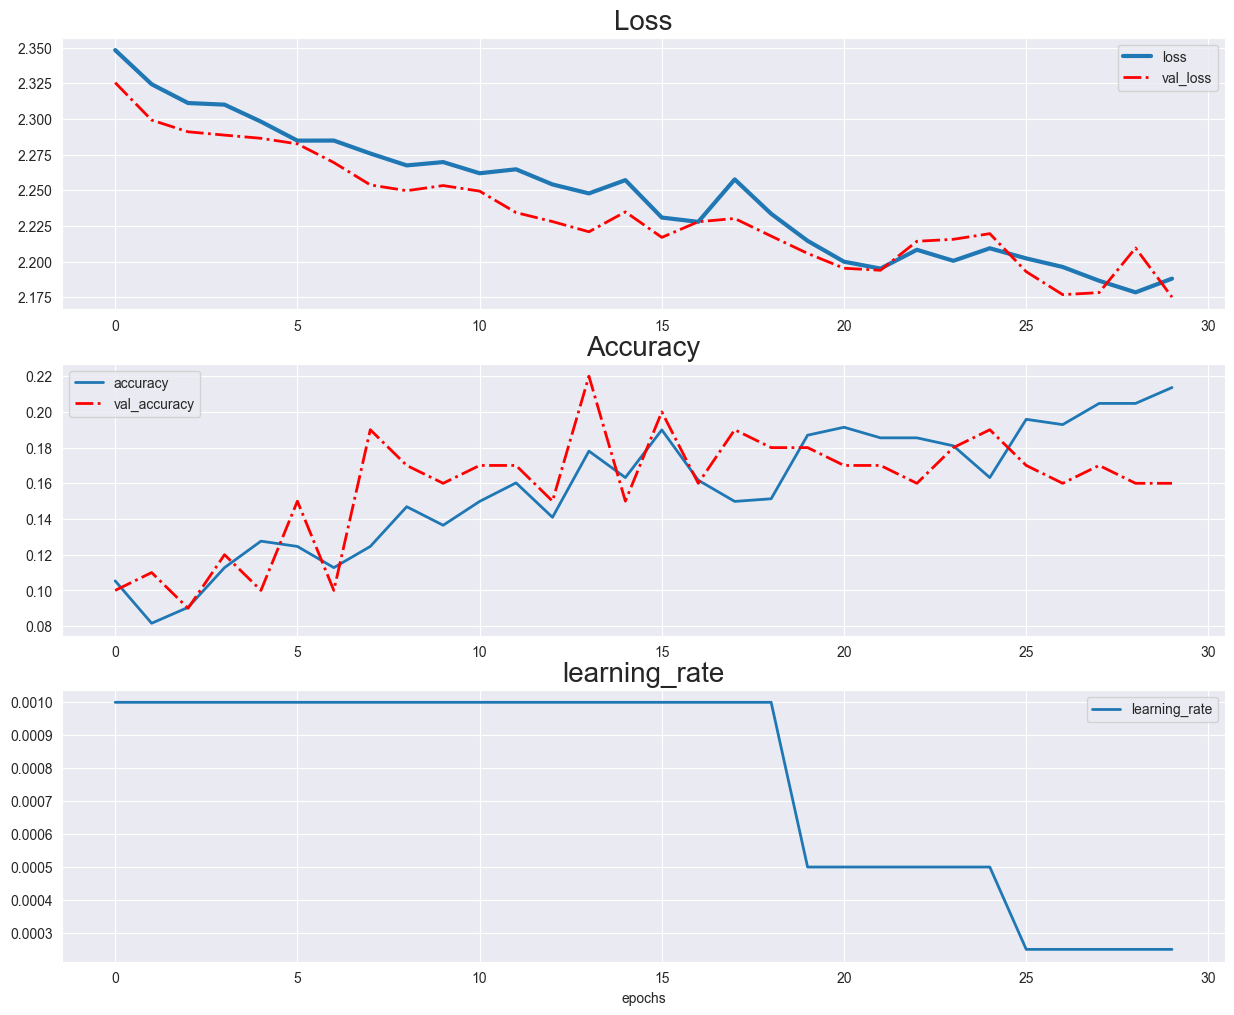

In [201]:
x = np.arange(len(result_df))
fig, ax = plt.subplots(3, 1, figsize=(15, 12))
#  AX0 : Loss
ax[0].plot(x, result_df.loss, label='loss', linewidth=3)
ax[0].plot(x, result_df.val_loss, label='val_loss', linewidth=2, ls='-.', c='r')
ax[0].set_title('Loss', fontsize=20)
ax[0].legend()

#  AX1 : Loss
ax[1].plot(x, result_df.accuracy, label='accuracy', linewidth=2)
ax[1].plot(x, result_df.val_accuracy, label='val_accuracy', linewidth=2, ls='-.', c='r')
ax[1].set_title('Accuracy', fontsize=20)
ax[1].legend()

#  AX2 : Loss
ax[2].plot(x, result_df.learning_rate, label='learning_rate', linewidth=2)
ax[2].set_title('learning_rate', fontsize=20)
ax[2].set_xlabel('epochs')
ax[2].legend()


plt.sharex=True


plt.show()

### **6.9 - Avaliar o Modelo**

In [204]:
# checkpoint callback, save base model weights in "MyModel.keras".
# So, we should load it
best_model_2 = models.load_model('MyModel_v2.keras')

In [205]:
test_loss, test_acc = best_model_2.evaluate(test_generator)

print(colored(f'Test Loss : {round(test_loss, 3)}', 'green', attrs=['bold']))
print(colored(f'Test Accuracy : {round(test_acc, 3)}', 'green', attrs=['bold']))

3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3758 - loss: 2.0908
Test Loss : 2.099
Test Accuracy : 0.33


In [207]:
def evaluate_model_performance(model, val_generator, class_labels=None):
    """
    Avalia o desempenho do modelo no conjunto de validação e exibe o relatório de classificação.

    Parâmetros:
    - model: Modelo treinado.
    - val_generator: Gerador de dados de validação.
    - class_labels: Lista de nomes das classes. Se None, será extraída do gerador.

    Retorna:
    - report: Relatório de classificação como string.
    """
    # Obter os rótulos verdadeiros do gerador
    true_labels = val_generator.classes

    # Obter nomes das classes, se não fornecidos
    if class_labels is None:
        class_labels = list(val_generator.class_indices.keys())

    # Fazer predições usando o modelo
    predictions = model.predict(val_generator, steps=len(val_generator))

    # Obter a classe prevista (argmax retorna o índice da classe com maior probabilidade)
    predicted_labels = np.argmax(predictions, axis=1)

    # Gerar relatório de classificação
    report = classification_report(true_labels, predicted_labels, target_names=class_labels)
    print(report)
    print('\n')

    # Matriz de confusão
    cm = confusion_matrix(true_labels, predicted_labels)

    # Plotar matriz de confusão com Seaborn
    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_labels, yticklabels=class_labels, cmap='Blues')
    plt.xlabel('Rótulos Previstos')
    plt.ylabel('Rótulos Verdadeiros')
    plt.title('Matriz de Confusão')
    plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step
              precision    recall  f1-score   support

    beetroot       0.13      0.40      0.20        10
      carrot       0.05      0.10      0.06        10
        corn       0.20      0.10      0.13        10
    eggplant       0.24      0.50      0.32        10
       lemon       0.31      0.40      0.35        10
       onion       0.00      0.00      0.00        10
     paprika       0.00      0.00      0.00        10
     raddish       0.00      0.00      0.00        10
   sweetcorn       0.00      0.00      0.00        10
  watermelon       0.14      0.10      0.12        10

    accuracy                           0.16       100
   macro avg       0.11      0.16      0.12       100
weighted avg       0.11      0.16      0.12       100





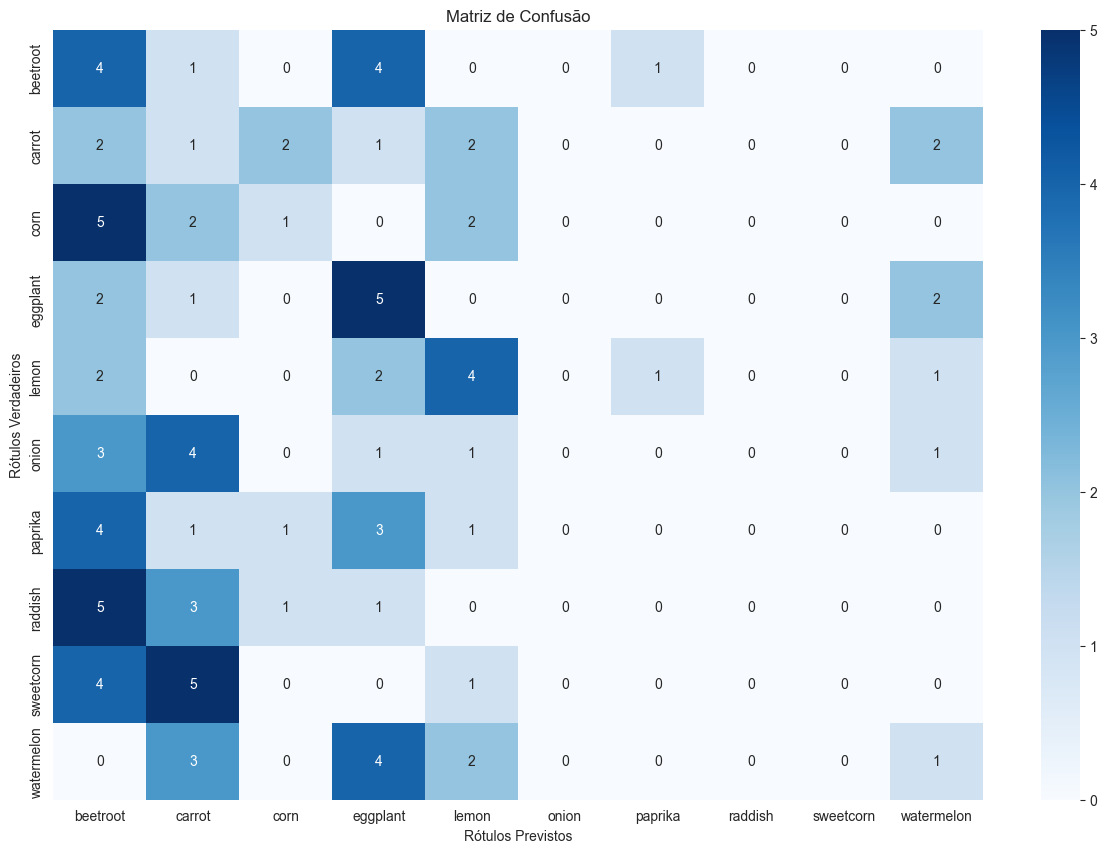

In [ ]:
classes = [class_name for class_name in df_teste_no_dupli_v3['category_folder']]

evaluate_model_performance(best_model_2, validation_generator, classes)